In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("250317 _ GHTK - yennt84 - FADR - yennt84.csv")

In [56]:
df.head()

,customer_tel,pkg_order,nth_delivered,created,done_at,took_at,shop_code,shop__shop_order,customer_province_id,customer_province,...,num_pkg_fsuccess,num_pkg_finish,num_pkg_success,fadr_c,first_time_deliver,deliver_work_shift,deliver_hour,deliver_dayofweek,is_weekend,type_address_arr
0,84843666166,1542866071,1,2025-02-12 11:38:14,2025-02-14 17:56:33,2025-02-12 20:55:39,S22002728,22002728,830,Hà Giang,...,4,29,15,0.137931,2025-02-15 0:23:40,2.0,17.0,6.0,0.0,{cửa hàng/tạp hoá}
1,84982659292,1604664682,1,2025-03-10 11:04:22,2025-03-12 18:24:44,2025-03-10 13:26:44,S22548382,22548382,848,Hà Tĩnh,...,5,29,15,0.172414,2025-03-12 23:25:15,2.0,16.0,4.0,0.0,"{cơ quan nhà nước,cửa hàng/tạp hoá}"
2,84918159470,1351406797,4,2025-01-04 14:43:09,2025-01-13 20:48:45,2025-01-04 17:44:33,S22761161,22761161,823,Đồng Nai,...,4,29,25,0.137931,2025-01-07 19:57:21,1.0,12.0,3.0,0.0,NaN
3,84949944437,1951119016,2,2025-01-31 13:19:44,2025-02-05 18:18:42,2025-02-03 13:30:08,S337525,337525,851,Kiên Giang,...,5,28,22,0.178571,2025-02-05 18:41:16,1.0,11.0,4.0,0.0,{cửa hàng/tạp hoá}
4,84794794286,1448214555,2,2025-02-03 8:58:41,2025-02-07 19:23:38,2025-02-03 11:58:46,S21939600,21939600,834,Bà Rịa - Vũng Tàu,...,4,27,20,0.148148,2025-02-06 20:18:49,1.0,13.0,5.0,0.0,"{công ty,cửa hàng/tạp hoá}"


In [57]:
df.columns

Index(['customer_tel', 'pkg_order', 'nth_delivered', 'created', 'done_at',
       'took_at', 'shop_code', 'shop__shop_order', 'customer_province_id',
       'customer_province', 'customer_district_id', 'customer_district',
       'customer_ward_id', 'customer_ward', 'customer_street_id',
       'customer_first_address', 'customer_lat', 'customer_lng', 'pick_money',
       'value', 'insurance', 'ghtk__orders__num_products',
       'ghtk__orders__product_names',
       'fulfillment__package_product__products_details',
       'sku_ghtk__cat_lv1_id', 'sku_ghtk__cat_lv2_id', 'sku_ghtk__cat_lv3_id',
       'categories_os_1__name', 'categories_os_2__name',
       'categories_os_3__name', 'ghtk__packages__package_status_id',
       'ghtk__packages__pre_paid_ship', 'ghtk__packages__private_message',
       'ghtk__packages__message', 'ghtk__packages__customer_fullname',
       'ghtk__packages__pick_fullname', 'num_pkg_fsuccess', 'num_pkg_finish',
       'num_pkg_success', 'fadr_c', 'first_time_d

In [58]:
df['ghtk__packages__package_status_id'].value_counts()

ghtk__packages__package_status_id
6     2965
11     817
5       82
9       65
10      40
4       31
Name: count, dtype: int64

Trạng thái giao hàng (package_status_id) bao gồm:
1. Đã đối soát - 6
2. Không giao được hàng - 9
3. Đã đối soát công nợ trả hàng - 11
4. Đã giao hàng/Chưa đối soát - 5
5. Đã điều phối giao hàng/Đang giao hàng - 4
6. Delay giao hàng - 10


Data Preprocessing

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   customer_tel                                    4000 non-null   int64  
 1   pkg_order                                       4000 non-null   int64  
 2   nth_delivered                                   4000 non-null   int64  
 3   created                                         4000 non-null   object 
 4   done_at                                         4000 non-null   object 
 5   took_at                                         3978 non-null   object 
 6   shop_code                                       4000 non-null   object 
 7   shop__shop_order                                4000 non-null   int64  
 8   customer_province_id                            4000 non-null   int64  
 9   customer_province                        

In [60]:
df.duplicated().sum()

0

In [61]:
df['ghtk__packages__package_status_id'].isnull().sum()

0

In [62]:
df['first_time_deliver'] = pd.to_datetime(df['first_time_deliver'])
df['created'] = pd.to_datetime(df['created'])
df['done_at'] = pd.to_datetime(df['done_at'])
df['took_at'] = pd.to_datetime(df['took_at'])

In [63]:
#Filter các đơn hàng đã hoàn thành với package_status_id in (5,6,9,11)
df_finished = df[df['ghtk__packages__package_status_id'].isin([5,6,9,11])]

In [64]:
df_finished.head()

,customer_tel,pkg_order,nth_delivered,created,done_at,took_at,shop_code,shop__shop_order,customer_province_id,customer_province,...,num_pkg_fsuccess,num_pkg_finish,num_pkg_success,fadr_c,first_time_deliver,deliver_work_shift,deliver_hour,deliver_dayofweek,is_weekend,type_address_arr
0,84843666166,1542866071,1,2025-02-12 11:38:14,2025-02-14 17:56:33,2025-02-12 20:55:39,S22002728,22002728,830,Hà Giang,...,4,29,15,0.137931,2025-02-15 00:23:40,2.0,17.0,6.0,0.0,{cửa hàng/tạp hoá}
1,84982659292,1604664682,1,2025-03-10 11:04:22,2025-03-12 18:24:44,2025-03-10 13:26:44,S22548382,22548382,848,Hà Tĩnh,...,5,29,15,0.172414,2025-03-12 23:25:15,2.0,16.0,4.0,0.0,"{cơ quan nhà nước,cửa hàng/tạp hoá}"
2,84918159470,1351406797,4,2025-01-04 14:43:09,2025-01-13 20:48:45,2025-01-04 17:44:33,S22761161,22761161,823,Đồng Nai,...,4,29,25,0.137931,2025-01-07 19:57:21,1.0,12.0,3.0,0.0,NaN
3,84949944437,1951119016,2,2025-01-31 13:19:44,2025-02-05 18:18:42,2025-02-03 13:30:08,S337525,337525,851,Kiên Giang,...,5,28,22,0.178571,2025-02-05 18:41:16,1.0,11.0,4.0,0.0,{cửa hàng/tạp hoá}
4,84794794286,1448214555,2,2025-02-03 08:58:41,2025-02-07 19:23:38,2025-02-03 11:58:46,S21939600,21939600,834,Bà Rịa - Vũng Tàu,...,4,27,20,0.148148,2025-02-06 20:18:49,1.0,13.0,5.0,0.0,"{công ty,cửa hàng/tạp hoá}"


In [65]:
#Lọc đơn hàng giao thành công lần đầu với package_status_id in (5,6) và nth_delivered == 1
df_first_success = df[df['ghtk__packages__package_status_id'].isin([5,6]) & df['nth_delivered'].isin([1])]

In [66]:
df_first_success.head()

,customer_tel,pkg_order,nth_delivered,created,done_at,took_at,shop_code,shop__shop_order,customer_province_id,customer_province,...,num_pkg_fsuccess,num_pkg_finish,num_pkg_success,fadr_c,first_time_deliver,deliver_work_shift,deliver_hour,deliver_dayofweek,is_weekend,type_address_arr
0,84843666166,1542866071,1,2025-02-12 11:38:14,2025-02-14 17:56:33,2025-02-12 20:55:39,S22002728,22002728,830,Hà Giang,...,4,29,15,0.137931,2025-02-15 00:23:40,2.0,17.0,6.0,0.0,{cửa hàng/tạp hoá}
8,84818901959,1334288375,1,2025-02-21 08:15:48,2025-02-24 13:54:03,2025-02-21 12:51:34,S20121773,20121773,126,TP Hồ Chí Minh,...,11,29,21,0.379310,2025-02-24 16:20:25,1.0,9.0,2.0,0.0,{cửa hàng/tạp hoá}
9,84975416039,1508388471,1,2025-01-10 16:22:07,2025-01-13 19:59:56,2025-01-10 18:40:07,S20780721,20780721,857,Ninh Thuận,...,11,29,28,0.379310,2025-01-13 19:59:27,1.0,12.0,2.0,0.0,{cửa hàng/tạp hoá}
27,84967960689,1314051989,1,2025-01-12 11:06:31,2025-01-14 18:17:27,2025-01-12 18:53:57,S22469890,22469890,816,Hưng Yên,...,10,29,28,0.344828,2025-01-15 00:56:48,2.0,17.0,3.0,0.0,{cửa hàng/tạp hoá}
33,84913885988,1486216864,1,2024-12-29 12:20:45,2025-01-01 13:58:46,2024-12-29 16:36:42,S17863034,17863034,841,Cà Mau,...,6,29,17,0.206897,2025-01-01 20:52:48,1.0,13.0,4.0,0.0,{cửa hàng/tạp hoá}


In [67]:
# Đếm số đơn hàng giao thành công lần đầu của mỗi khách hàng
num_first_success = df_first_success.groupby('customer_tel').size().rename("num_first_success")

In [68]:
# Đếm tổng số đơn hàng đã giao của mỗi khách hàng
num_total_success = df_finished.groupby('customer_tel').size().rename("num_total_success")

In [69]:
fadr_data = pd.concat([num_first_success, num_total_success], axis=1).fillna(0)

In [70]:
fadr_data

,num_first_success,num_total_success
customer_tel,,
84328758551,7.0,29
84329389499,9.0,24
84333258778,10.0,23
84334319681,5.0,28
84334736188,5.0,28
...,...,...
84913597742,0.0,6
84917584562,0.0,7
84968599668,0.0,2


In [71]:
fadr_data['FADR'] = ((fadr_data['num_first_success'] / fadr_data['num_total_success']) * 100).round(2).astype(str)
fadr_data

,num_first_success,num_total_success,FADR
customer_tel,,,
84328758551,7.0,29,24.14
84329389499,9.0,24,37.5
84333258778,10.0,23,43.48
84334319681,5.0,28,17.86
84334736188,5.0,28,17.86
...,...,...,...
84913597742,0.0,6,0.0
84917584562,0.0,7,0.0
84968599668,0.0,2,0.0


In [72]:
fadr_data['FADR'] = pd.to_numeric(fadr_data['FADR'])

In [73]:
fadr_data['FADR'].value_counts()

FADR
24.14    17
33.33    14
17.86    12
14.29    11
20.69    11
0.00     10
27.59     9
37.50     9
17.24     7
11.11     6
40.00     6
13.79     6
12.50     6
25.00     5
16.67     5
10.71     4
20.00     4
30.00     4
18.18     4
32.00     4
27.27     4
22.22     3
50.00     3
34.78     3
42.86     3
8.33      3
36.00     3
21.43     2
28.57     2
39.13     2
30.77     2
9.09      2
13.33     2
10.00     1
31.82     1
36.36     1
60.00     1
26.09     1
28.00     1
7.69      1
31.25     1
15.38     1
23.08     1
21.74     1
42.31     1
10.34     1
23.81     1
43.48     1
26.32     1
24.00     1
Name: count, dtype: int64

Phân tích dữ liệu khám phá (EDA)

Chia khách hàng thành 4 nhóm dựa trên chỉ số FADR:
1. Nhóm 1: FADR < 10%
2. Nhóm 2: FADR từ 10% đến 30%
3. Nhóm 3: FADR từ 30% đến 50%
4. Nhóm 4: FADR > 50%

In [74]:
def categorize_fadr(fadr):
    if fadr < 10:
        return 1
    elif 10 <= fadr < 30:
        return 2
    elif 30 <= fadr < 50:
        return 3
    else:
        return 4

In [75]:
fadr_data['fadr_group'] = fadr_data['FADR'].apply(categorize_fadr)

In [76]:
fadr_data

,num_first_success,num_total_success,FADR,fadr_group
customer_tel,,,,
84328758551,7.0,29,24.14,2
84329389499,9.0,24,37.50,3
84333258778,10.0,23,43.48,3
84334319681,5.0,28,17.86,2
84334736188,5.0,28,17.86,2
...,...,...,...,...
84913597742,0.0,6,0.00,1
84917584562,0.0,7,0.00,1
84968599668,0.0,2,0.00,1


In [77]:
df_merged = df.merge(fadr_data[['fadr_group']], on="customer_tel", how="left")

In [78]:
df_merged.head()

,customer_tel,pkg_order,nth_delivered,created,done_at,took_at,shop_code,shop__shop_order,customer_province_id,customer_province,...,num_pkg_finish,num_pkg_success,fadr_c,first_time_deliver,deliver_work_shift,deliver_hour,deliver_dayofweek,is_weekend,type_address_arr,fadr_group
0,84843666166,1542866071,1,2025-02-12 11:38:14,2025-02-14 17:56:33,2025-02-12 20:55:39,S22002728,22002728,830,Hà Giang,...,29,15,0.137931,2025-02-15 00:23:40,2.0,17.0,6.0,0.0,{cửa hàng/tạp hoá},2
1,84982659292,1604664682,1,2025-03-10 11:04:22,2025-03-12 18:24:44,2025-03-10 13:26:44,S22548382,22548382,848,Hà Tĩnh,...,29,15,0.172414,2025-03-12 23:25:15,2.0,16.0,4.0,0.0,"{cơ quan nhà nước,cửa hàng/tạp hoá}",2
2,84918159470,1351406797,4,2025-01-04 14:43:09,2025-01-13 20:48:45,2025-01-04 17:44:33,S22761161,22761161,823,Đồng Nai,...,29,25,0.137931,2025-01-07 19:57:21,1.0,12.0,3.0,0.0,NaN,2
3,84949944437,1951119016,2,2025-01-31 13:19:44,2025-02-05 18:18:42,2025-02-03 13:30:08,S337525,337525,851,Kiên Giang,...,28,22,0.178571,2025-02-05 18:41:16,1.0,11.0,4.0,0.0,{cửa hàng/tạp hoá},2
4,84794794286,1448214555,2,2025-02-03 08:58:41,2025-02-07 19:23:38,2025-02-03 11:58:46,S21939600,21939600,834,Bà Rịa - Vũng Tàu,...,27,20,0.148148,2025-02-06 20:18:49,1.0,13.0,5.0,0.0,"{công ty,cửa hàng/tạp hoá}",1


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

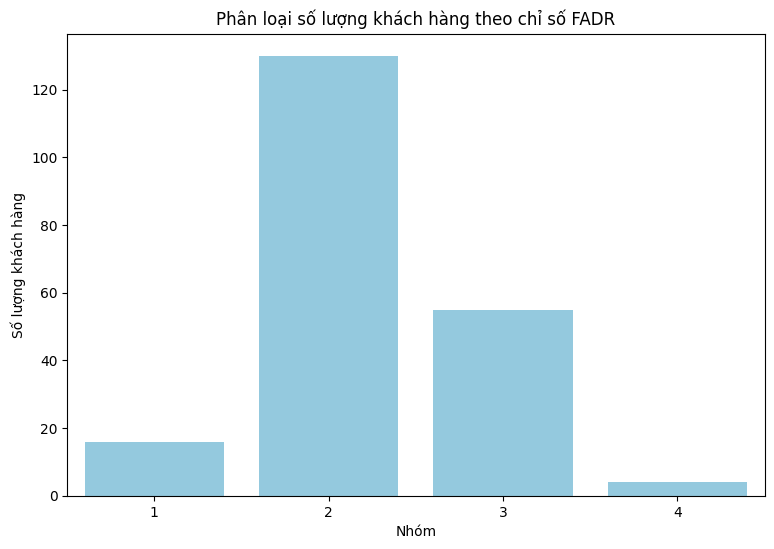

In [80]:
#Visual phân bổ số lượng khách hàng theo từng nhóm
plt.figure(figsize=(9, 6))
sns.countplot(data=fadr_data, x="fadr_group", order=[1,2,3,4], color='skyblue')
plt.title("Phân loại số lượng khách hàng theo chỉ số FADR")
plt.xlabel("Nhóm")
plt.ylabel("Số lượng khách hàng")
plt.show()

Nhóm 1

In [81]:
df_group1 = df_merged[df_merged["fadr_group"].isin([1])]

In [82]:
df_group1['customer_province'].value_counts()

customer_province
Phú Thọ              25
Hà Nội               17
Đồng Nai             13
Bà Rịa - Vũng Tàu    12
Lào Cai              12
Lai Châu             12
Ninh Thuận           12
Bình Phước           12
Long An               7
TP Hồ Chí Minh        7
Đà Nẵng               6
Cà Mau                6
Vĩnh Phúc             5
Hà Tĩnh               1
Name: count, dtype: int64

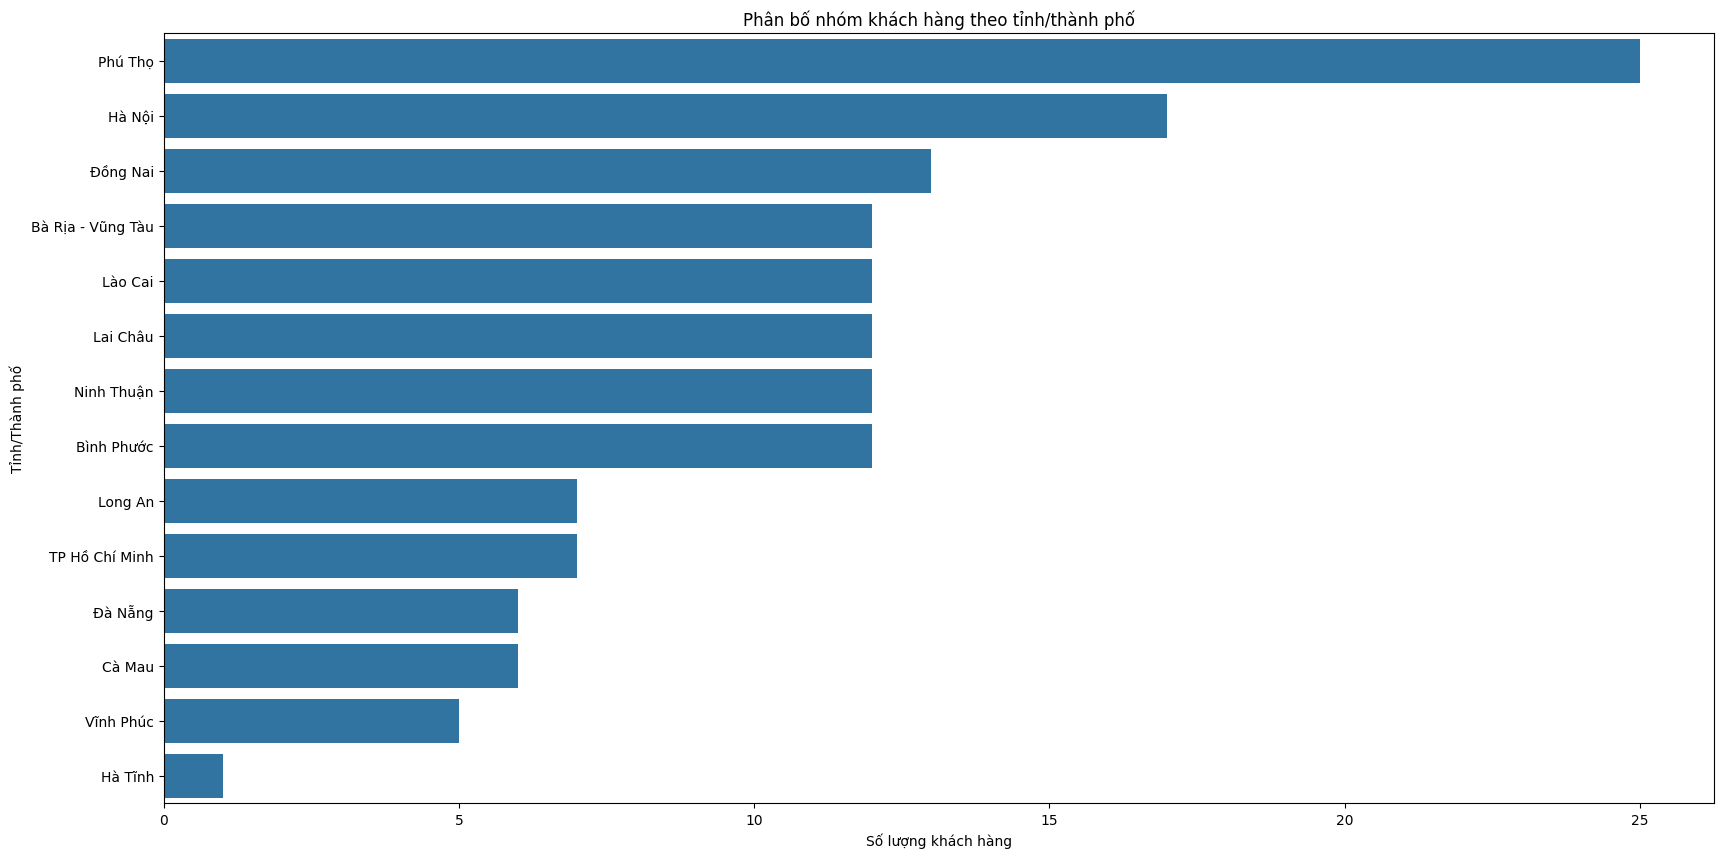

In [83]:
#Visual Tỉnh thành khách hàng có FADR thap nhat
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group1, y="customer_province", order=df_group1["customer_province"].value_counts().index)
plt.title("Phân bố nhóm khách hàng theo tỉnh/thành phố")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Tỉnh/Thành phố")
#plt.legend(title="Nhóm")
plt.show()

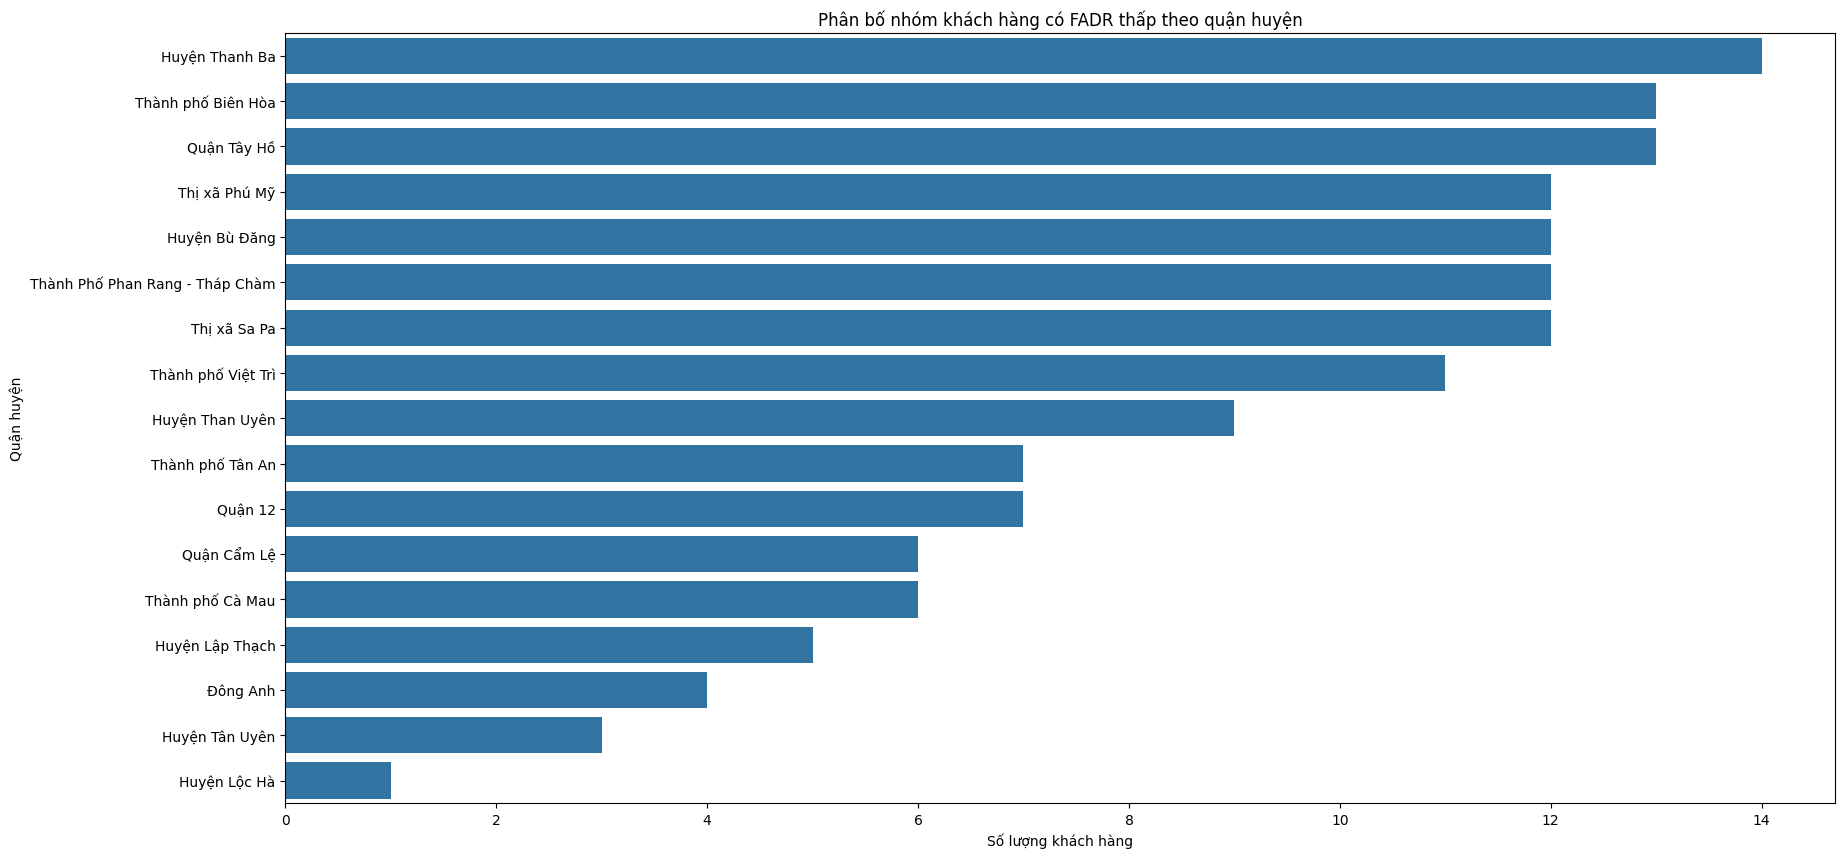

In [84]:
#Visual Quận huyện khách hàng có FADR thấp 
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group1, y="customer_district", order=df_group1["customer_district"].value_counts().index)
plt.title("Phân bố nhóm khách hàng có FADR thấp theo quận huyện")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Quận huyện")
plt.show()

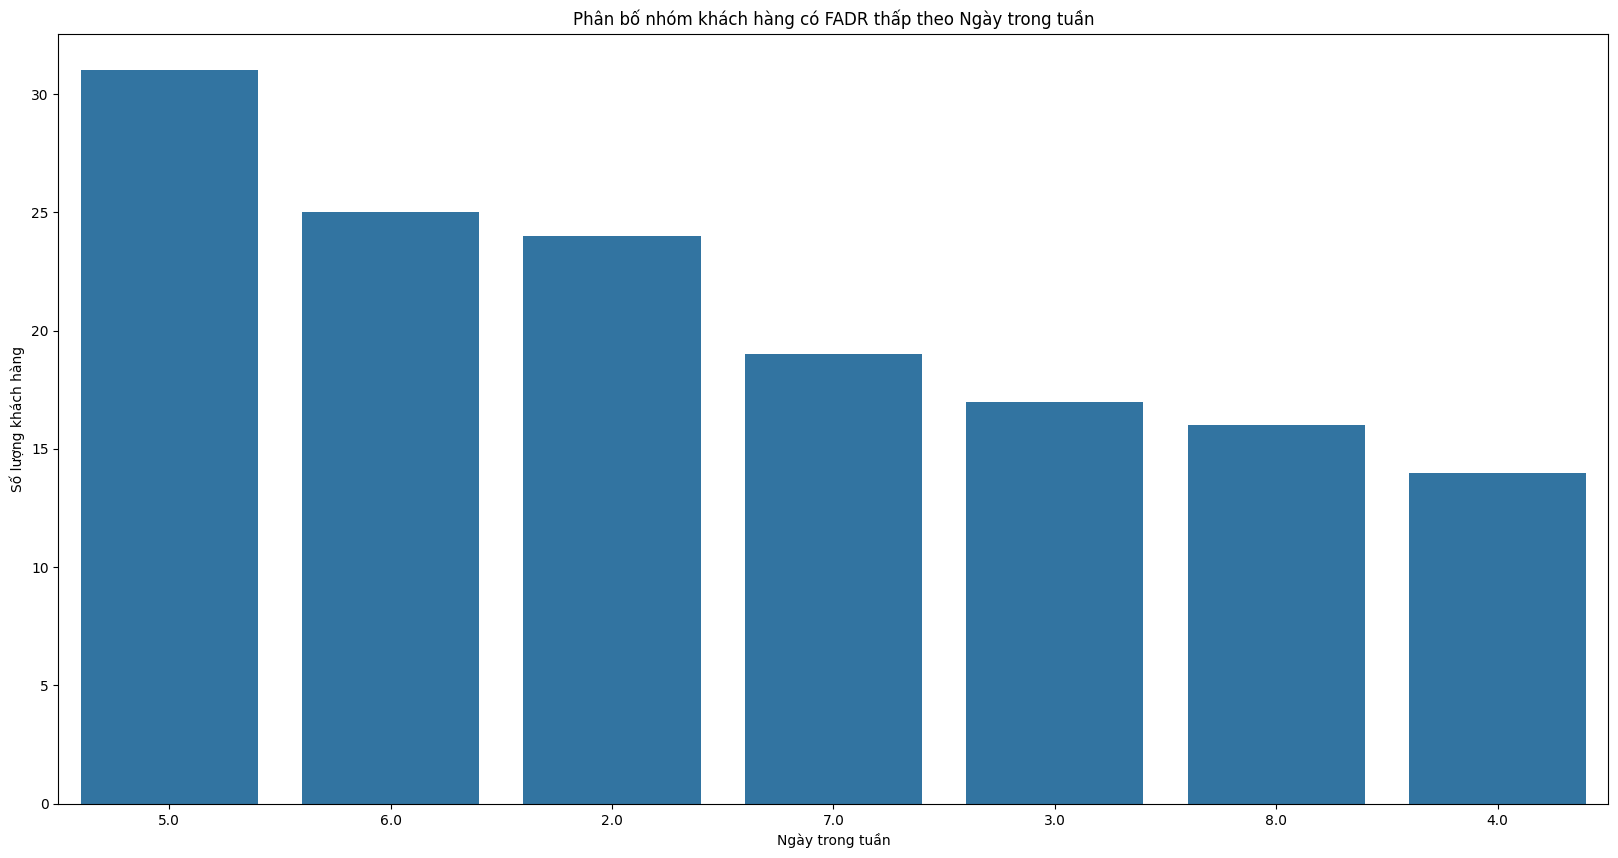

In [85]:
#Visual Ngày trong tuần nhận đơn hàng khách hàng có FADR thấp 
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group1, x="deliver_dayofweek", order=df_group1["deliver_dayofweek"].value_counts().index)
plt.title("Phân bố nhóm khách hàng có FADR thấp theo Ngày trong tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày trong tuần")
plt.show()

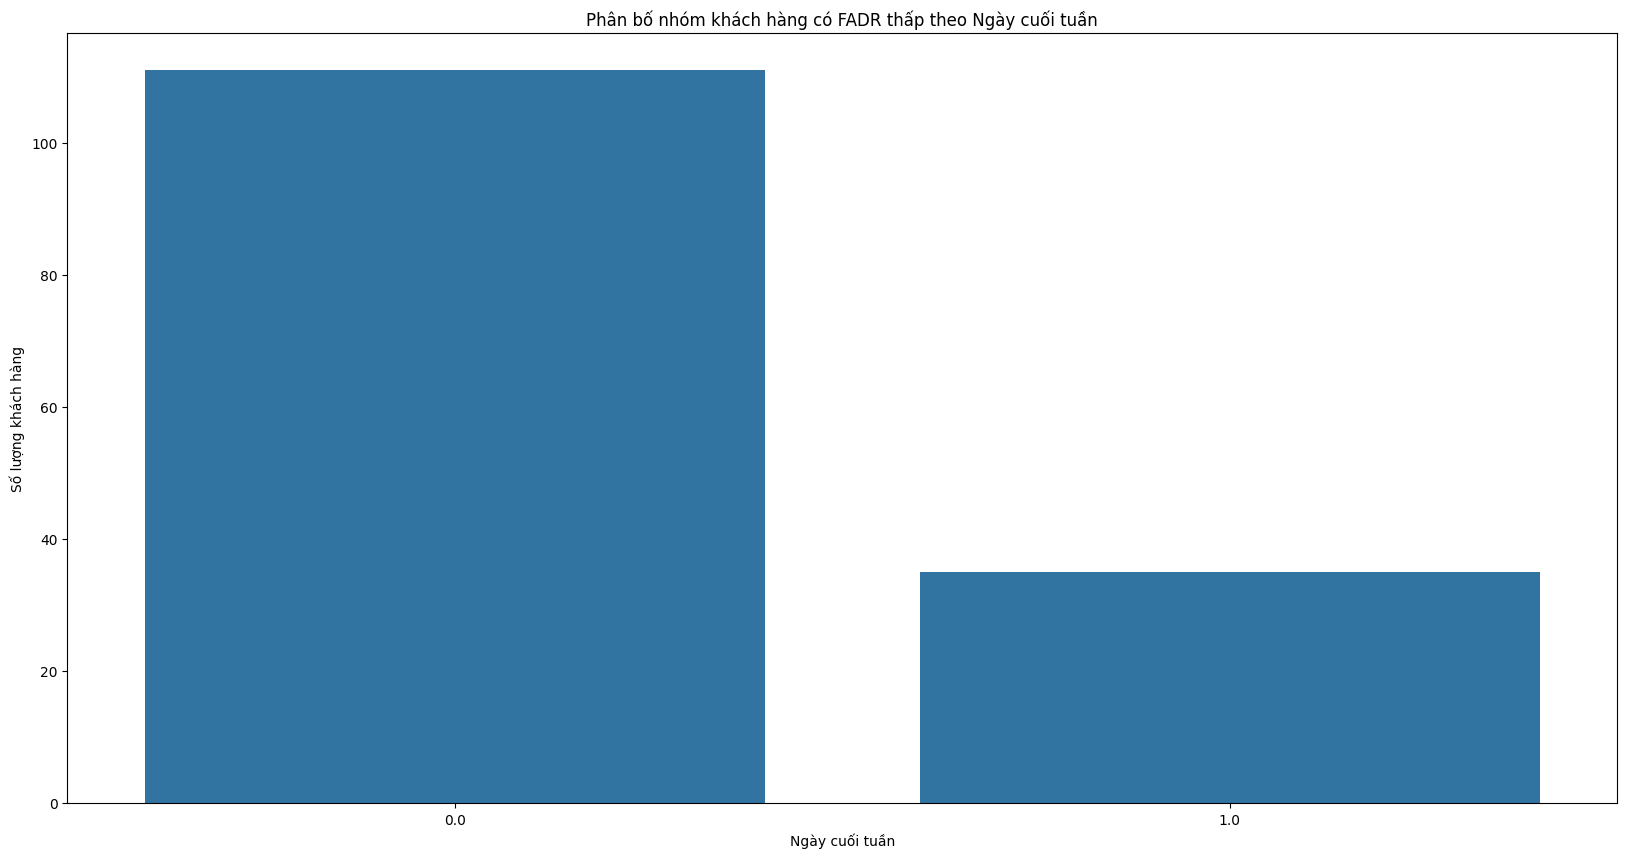

In [87]:
#Visual Ngày cuối tuần nhận đơn hàng khách hàng có FADR thấp 
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group1, x="is_weekend", order=df_group1["is_weekend"].value_counts().index)
plt.title("Phân bố nhóm khách hàng có FADR thấp theo Ngày cuối tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày cuối tuần")
plt.show()

In [121]:
df_group1.sort_values(by='value', ascending=False, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15116\2553451164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group1.sort_values(by='value', ascending=False, inplace=True)


In [123]:
df_group1['value']

799     20000000
3767    19395000
1177    16130000
541     15660000
2544    15660000
          ...   
1605       95000
2665       79000
1433       55000
836        50000
1842       49000
Name: value, Length: 147, dtype: int64

In [124]:
df_group1['ghtk__orders__product_names']

799         {12 64}
3767    {iphone 11}
1177           {11}
541            {dt}
2544           {dt}
           ...     
1605        {AO 95}
2665     {LOC GIAI}
1433          {len}
836       {áo thun}
1842        {O MAI}
Name: ghtk__orders__product_names, Length: 147, dtype: object

In [127]:
df_group1['nth_delivered'].value_counts()

nth_delivered
3    60
2    39
4    21
1     8
5     7
6     5
8     4
7     2
0     1
Name: count, dtype: int64

In [130]:
df_group1[df_group1['nth_delivered']==8]['value']

2350    4450000
3937    4200000
1604    2176000
2596    2060000
Name: value, dtype: int64

Nhóm 2

In [131]:
df_group2 = df_merged[df_merged["fadr_group"].isin([2])]

In [133]:
df_group2['customer_province'].value_counts()

customer_province
TP Hồ Chí Minh       465
Đồng Nai             212
Kiên Giang           144
Hà Nội               118
Quảng Ninh           100
Bà Rịa - Vũng Tàu     98
Bình Dương            89
Sóc Trăng             88
Đà Nẵng               85
Cà Mau                77
Hải Phòng             74
Hòa Bình              69
Hải Dương             66
Lạng Sơn              59
Hà Tĩnh               58
Điện Biên             58
Hưng Yên              57
Bình Thuận            54
Thanh Hóa             49
Đắk Lắk               48
Hà Giang              44
Khánh Hòa             44
Tuyên Quang           41
Quảng Nam             37
Phú Thọ               37
Bắc Giang             34
Lâm Đồng              33
Nghệ An               32
Gia Lai               31
Bắc Ninh              31
Lai Châu              29
Bình Định             29
Kon Tum               29
Cao Bằng              29
An Giang              29
Vĩnh Phúc             29
Phú Yên               29
Đồng Tháp             29
Bạc Liêu              28
Tiền Gi

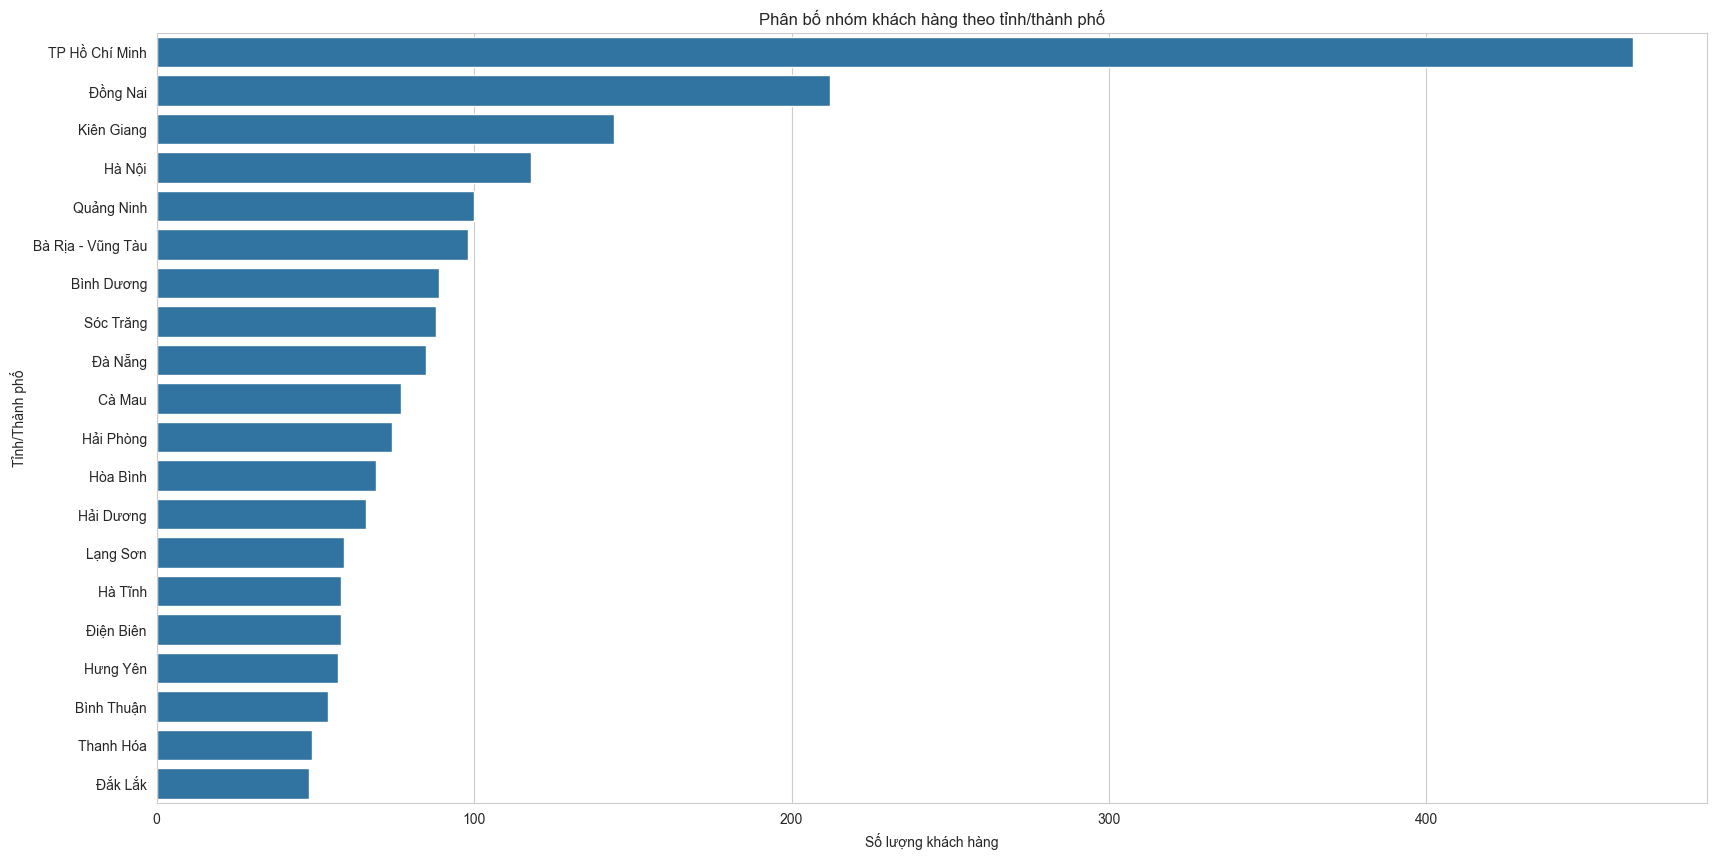

In [148]:
#Visual Tỉnh thành khách hàng có FADR thap nhat
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group2, y="customer_province", order=df_group2["customer_province"].value_counts().index[:20])
plt.title("Phân bố nhóm khách hàng theo tỉnh/thành phố")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Tỉnh/Thành phố")
#plt.legend(title="Nhóm")
plt.show()

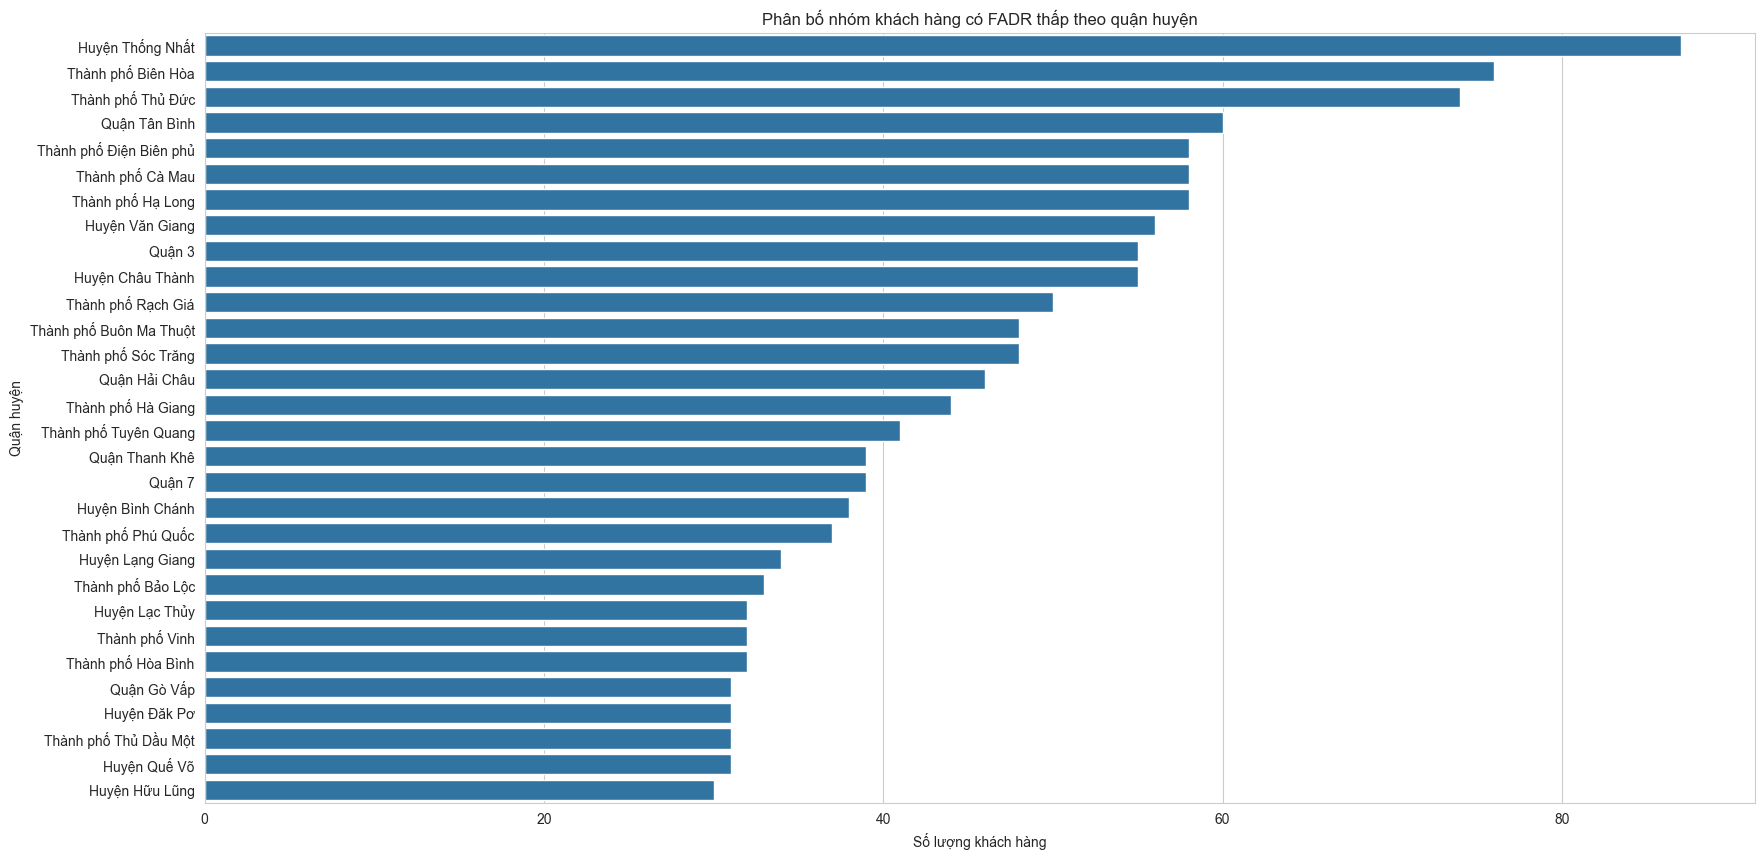

In [145]:
#Visual Quận huyện khách hàng có FADR thấp 
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group2, y="customer_district", order=df_group2["customer_district"].value_counts().index[:30])
plt.title("Phân bố nhóm khách hàng có FADR thấp theo quận huyện")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Quận huyện")
plt.show()

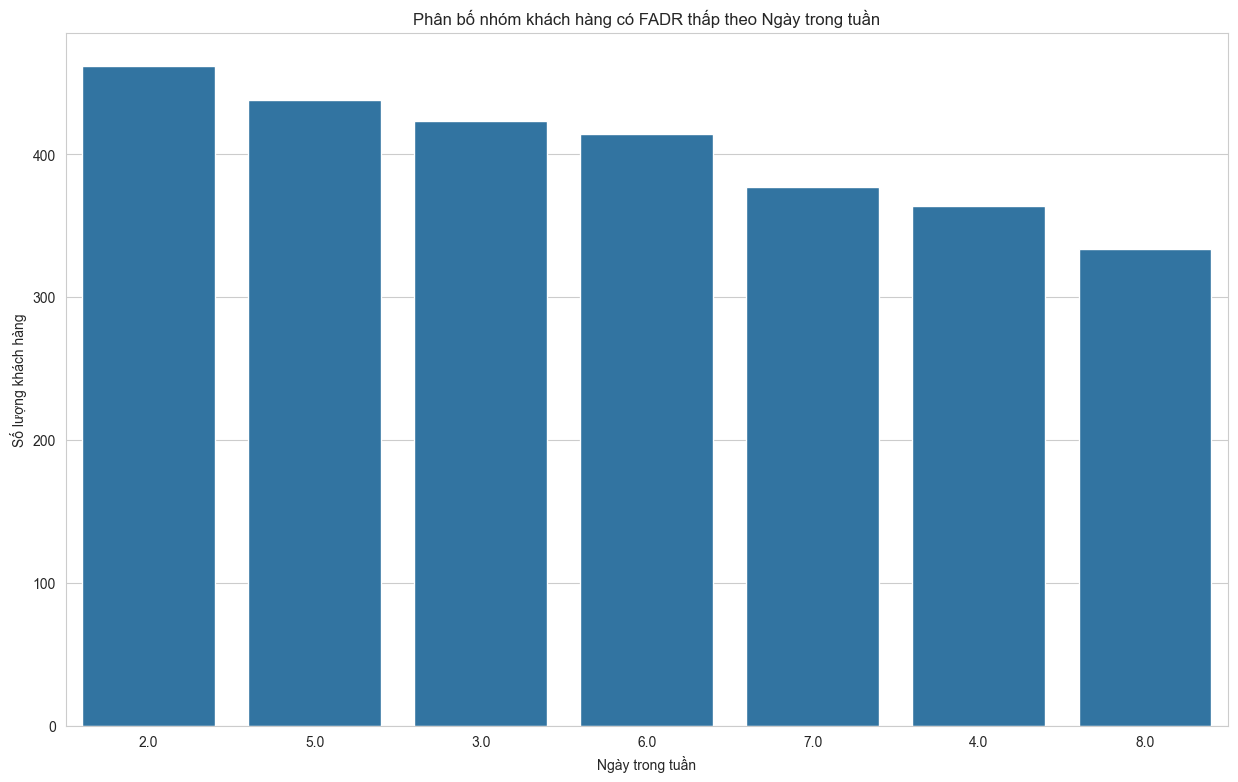

In [147]:
#Visual Ngày trong tuần nhận đơn hàng khách hàng có FADR thấp 
plt.figure(figsize=(15, 9))
sns.countplot(data=df_group2, x="deliver_dayofweek", order=df_group2["deliver_dayofweek"].value_counts().index)
plt.title("Phân bố nhóm khách hàng có FADR thấp theo Ngày trong tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày trong tuần")
plt.show()

In [159]:
df_group2['deliver_dayofweek'].value_counts()

deliver_dayofweek
2.0    462
5.0    438
3.0    423
6.0    414
7.0    377
4.0    364
8.0    334
Name: count, dtype: int64

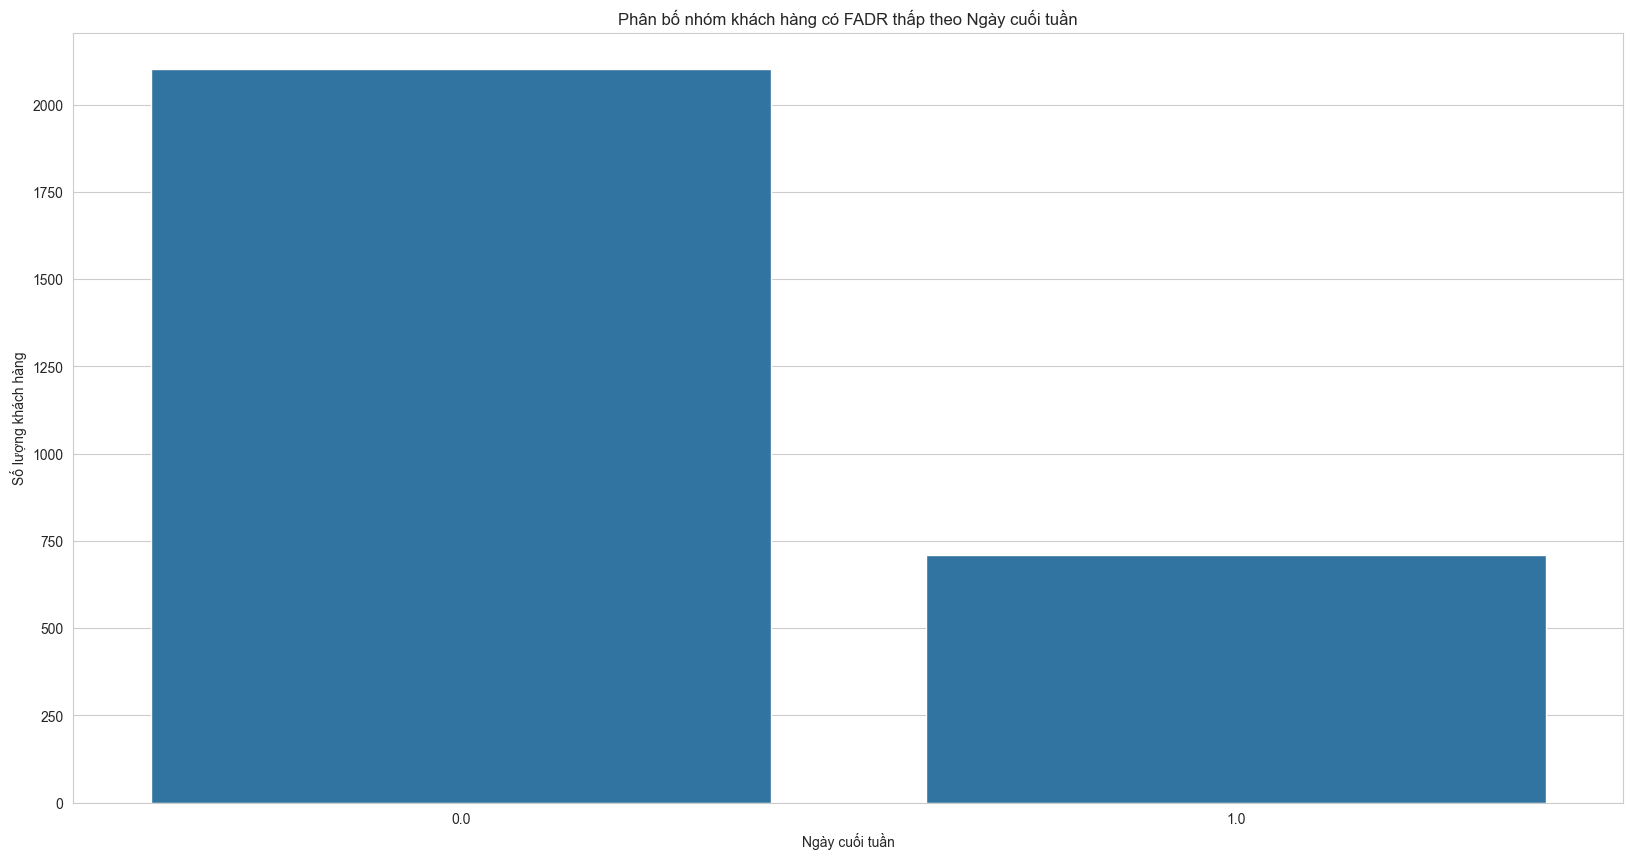

In [156]:
#Visual Ngày cuối tuần nhận đơn hàng khách hàng có FADR thấp 
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group2, x="is_weekend", order=df_group2["is_weekend"].value_counts().index)
plt.title("Phân bố nhóm khách hàng có FADR thấp theo Ngày cuối tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày cuối tuần")
plt.show()

In [158]:
df_group2.sort_values(by='value', ascending=False)['value']


1002    24270000
3797    21195000
394     20850000
3747    20000000
3569    20000000
          ...   
1376       25000
2252       20000
266           20
1819           1
1548           1
Name: value, Length: 2820, dtype: int64

In [181]:
df_group2.sort_values(by='value', ascending=False)['ghtk__orders__product_names']


1002                           {Áo Dài}
3797                           {Áo Dài}
394                            {Áo Dài}
3747              {điện thoại 12prm128}
3569           {điện thoại 12prm 128x2}
                     ...               
1376    {SHIP TRẢ HÀNG - 25122024 - 25}
2252                              {nón}
266                        {hoài hoàng}
1819                          {quan áo}
1548         {HH - Sữa Zextra lon 400g}
Name: ghtk__orders__product_names, Length: 2820, dtype: object

In [157]:
df_group2['nth_delivered'].value_counts()

nth_delivered
2     762
3     756
1     571
4     357
5     164
6     111
7      39
8      22
9      15
10     10
12      4
11      3
14      2
0       2
20      1
17      1
Name: count, dtype: int64

In [202]:
df_group2[df_group2['nth_delivered'].isin([0])]['ghtk__packages__package_status_id']


1751    11
3249    11
Name: ghtk__packages__package_status_id, dtype: int64

In [206]:
df_group2[df_group2['nth_delivered'].isin([6,7,8,9,10,12,11,14,17,20])]['ghtk__packages__private_message'].to_csv('messages.txt', index=False, header=False)


In [205]:
pd.set_option('display.max_colwidth', None)
df_group2[df_group2['nth_delivered'].isin([8,9])]['ghtk__packages__private_message']


163                                                                                                                                                                                                                                                                                  NaN
493                                                                                                                                                                                                                            Hệ thống tự động tạo ticket nghi mất hàng do Quá mốc xuất
663                                                                                                                                                                                                                                                                                  NaN
668                                                                                                                                                          

Nhóm 3

In [207]:
df_group3 = df_merged[df_merged["fadr_group"].isin([3])]

In [210]:
df_group3['customer_province'].value_counts()

customer_province
TP Hồ Chí Minh       238
Hà Nội               117
Ninh Thuận            72
Vĩnh Long             53
An Giang              46
Bà Rịa - Vũng Tàu     45
Bình Thuận            44
Đồng Nai              32
Tiền Giang            30
Long An               28
Điện Biên             26
Quảng Ninh            24
Hưng Yên              24
Nghệ An               23
Cao Bằng              23
Đắk Nông              21
Bến Tre               21
Thừa Thiên Huế        21
Bắc Ninh              21
Đà Nẵng               16
Hà Giang              16
Tây Ninh              12
Thái Nguyên           11
Bình Định             10
Hà Nam                 7
Quảng Ngãi             6
Kiên Giang             6
Đồng Tháp              5
Bạc Liêu               4
Thành phố Huế          3
Name: count, dtype: int64

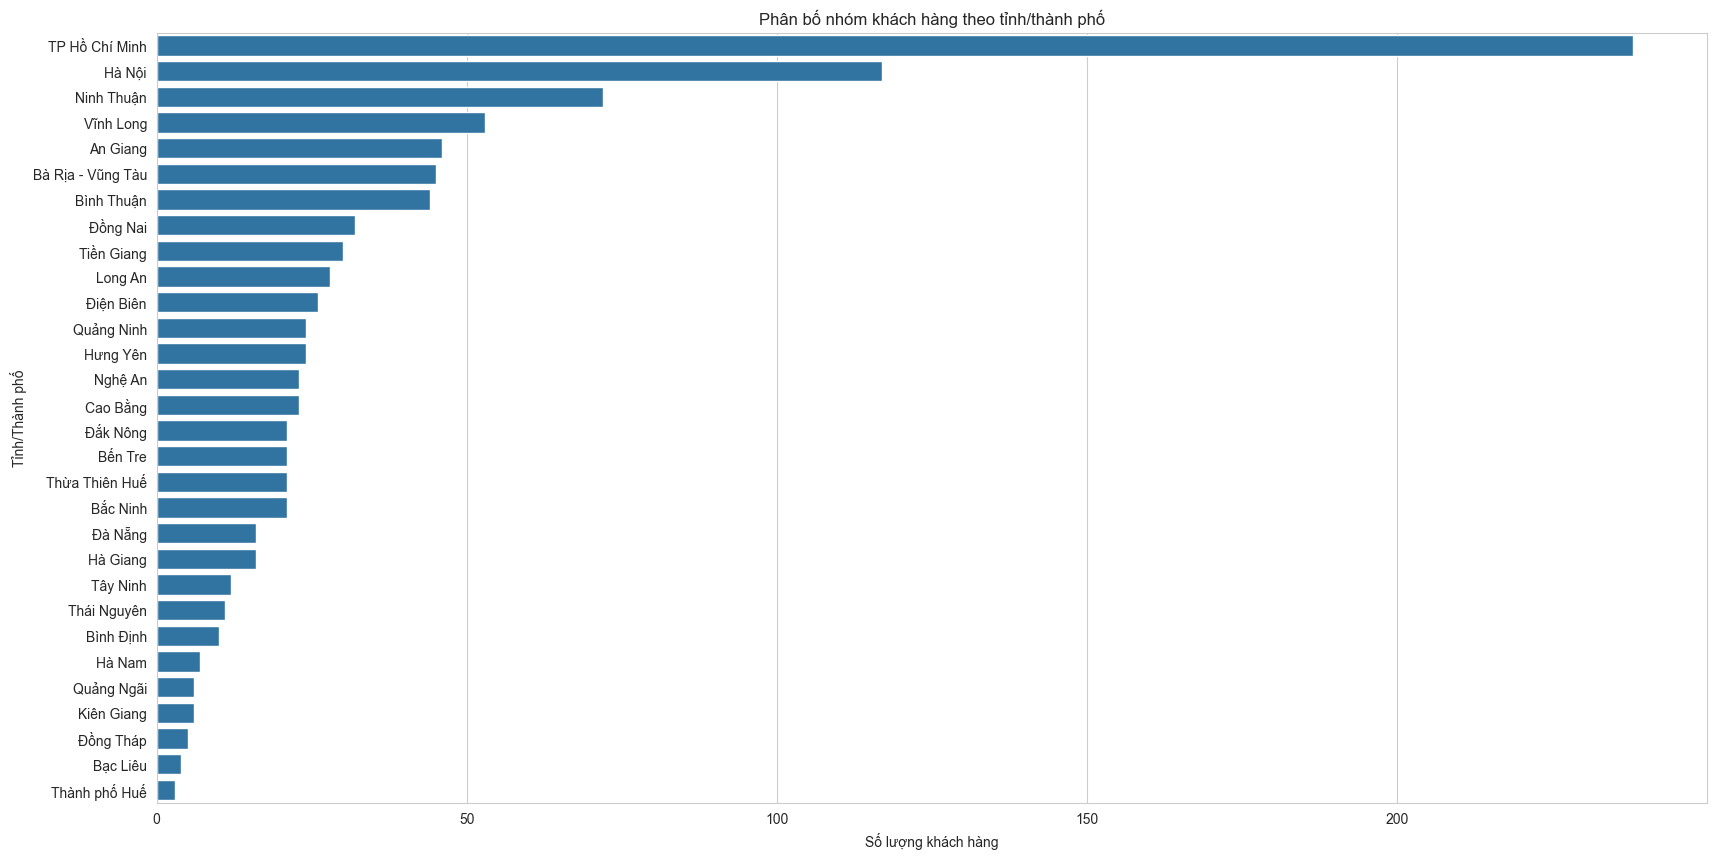

In [211]:
#Visual Tỉnh thành khách hàng nhóm 3
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group3, y="customer_province", order=df_group3["customer_province"].value_counts().index)
plt.title("Phân bố nhóm khách hàng theo tỉnh/thành phố")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Tỉnh/Thành phố")
#plt.legend(title="Nhóm")
plt.show()

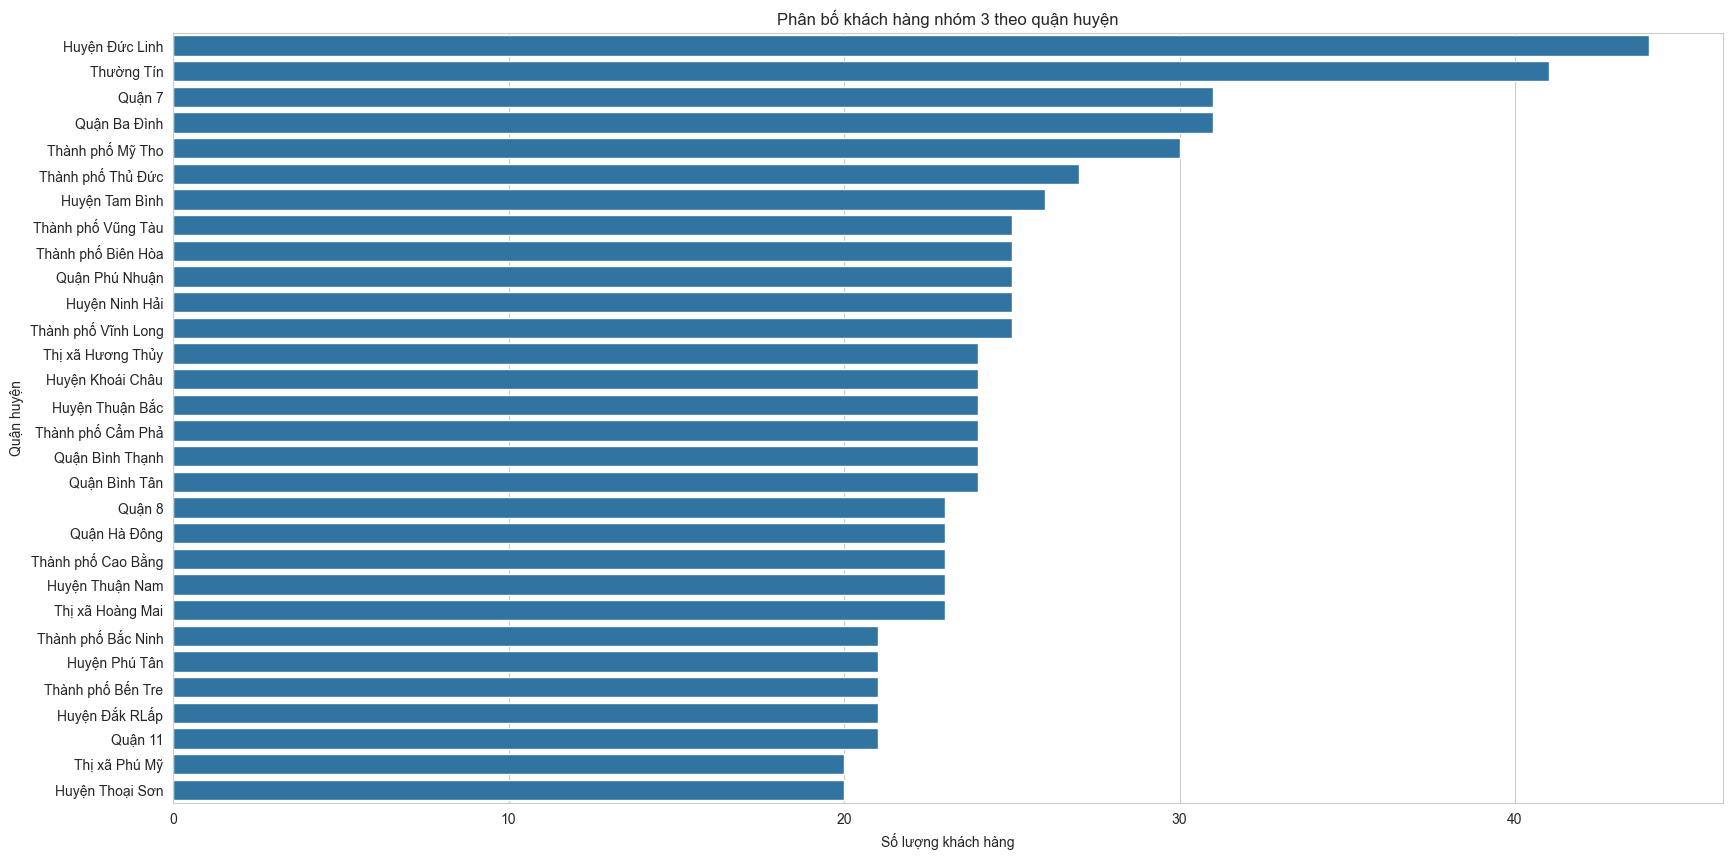

In [214]:
#Visual Quận huyện khách hàng nhóm 3
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group3, y="customer_district", order=df_group3["customer_district"].value_counts().index[:30])
plt.title("Phân bố khách hàng nhóm 3 theo quận huyện")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Quận huyện")
plt.show()

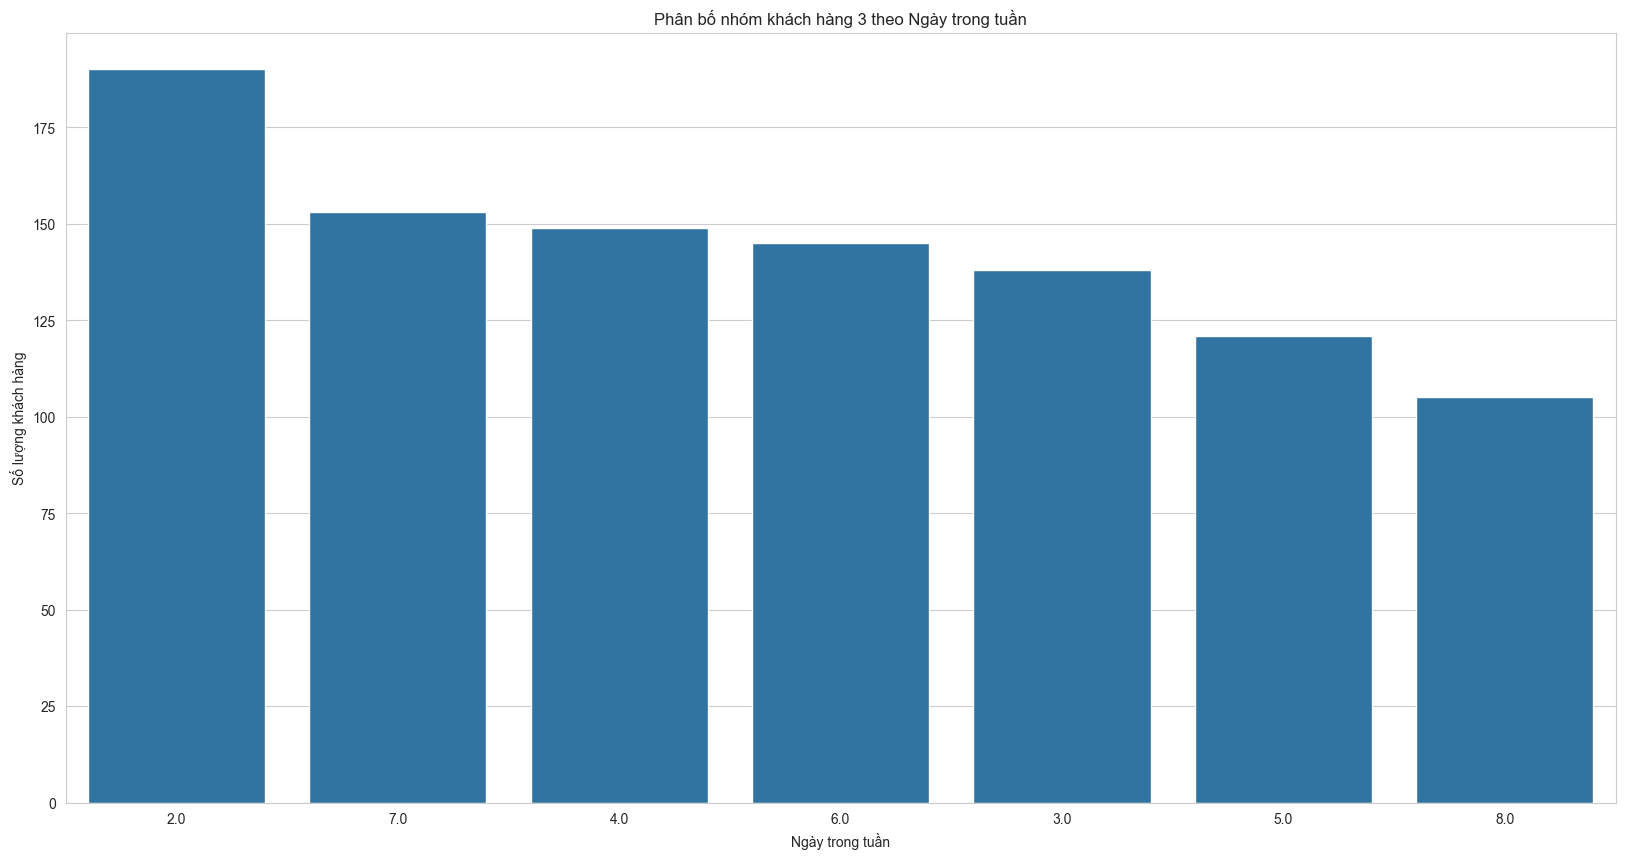

In [215]:
#Visual Ngày trong tuần nhận đơn hàng khách hàng nhóm 3
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group3, x="deliver_dayofweek", order=df_group3["deliver_dayofweek"].value_counts().index)
plt.title("Phân bố nhóm khách hàng 3 theo Ngày trong tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày trong tuần")
plt.show()

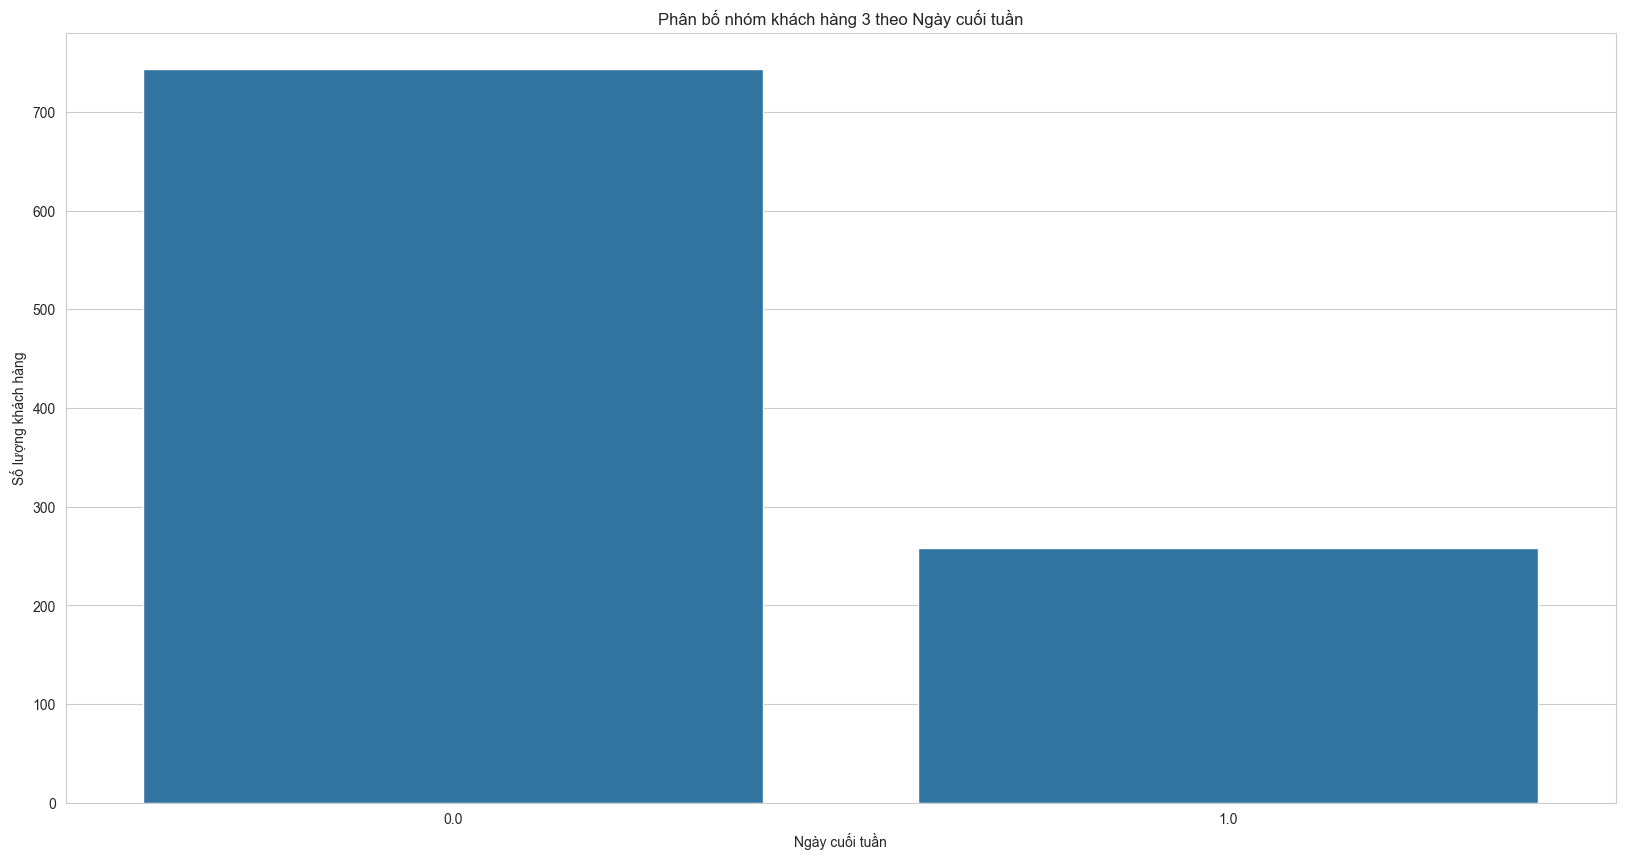

In [216]:
#Visual Ngày cuối tuần nhận đơn hàng khách hàng nhóm 3
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group3, x="is_weekend", order=df_group3["is_weekend"].value_counts().index)
plt.title("Phân bố nhóm khách hàng 3 theo Ngày cuối tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày cuối tuần")
plt.show()

In [219]:
df_group3.sort_values(by='value', ascending=False)['value']

1413    20000000
89      20000000
454     19445000
3107    17640000
2552    17230000
          ...   
675        50000
210        10000
2135        1000
1875         170
3774           0
Name: value, Length: 1005, dtype: int64

In [220]:
df_group3.sort_values(by='value', ascending=False)['ghtk__orders__product_names']

1413    {14 PLus CNC 128gb Xanh,14 Plus Lock New CNC Tím 128gb}
89                             {16Promax Lock Sa Mạc 256gb CNC}
454                                            {xác máy icloud}
3107                                           {xác máy icloud}
2552                                           {xác máy icloud}
                                 ...                           
675                                                     {Thuốc}
210                                                   {quần áo}
2135                                          {camera bảo hành}
1875                                         {Sản phẩm đã chốt}
3774         {Kenewomen REBRAND long sleeve croptop-Đen / Free}
Name: ghtk__orders__product_names, Length: 1005, dtype: object

In [221]:
df_group3["nth_delivered"].value_counts()

nth_delivered
1     363
2     266
3     221
4      79
5      39
6      16
7       7
8       5
9       3
10      2
0       2
11      1
12      1
Name: count, dtype: int64

Nhóm 4

In [244]:
df_group4 = df_merged[df_merged["fadr_group"].isin([4])]

In [247]:
df_group4['customer_province'].value_counts()

customer_province
TP Hồ Chí Minh    10
Hà Nội             8
Đắk Lắk            6
Tuyên Quang        4
Name: count, dtype: int64

In [258]:
df_group4['customer_district'].value_counts()

customer_district
Quận 5                   9
Quận Hai Bà Trưng        8
Huyện Krông Bông         6
Thành phố Tuyên Quang    4
Quận 11                  1
Name: count, dtype: int64

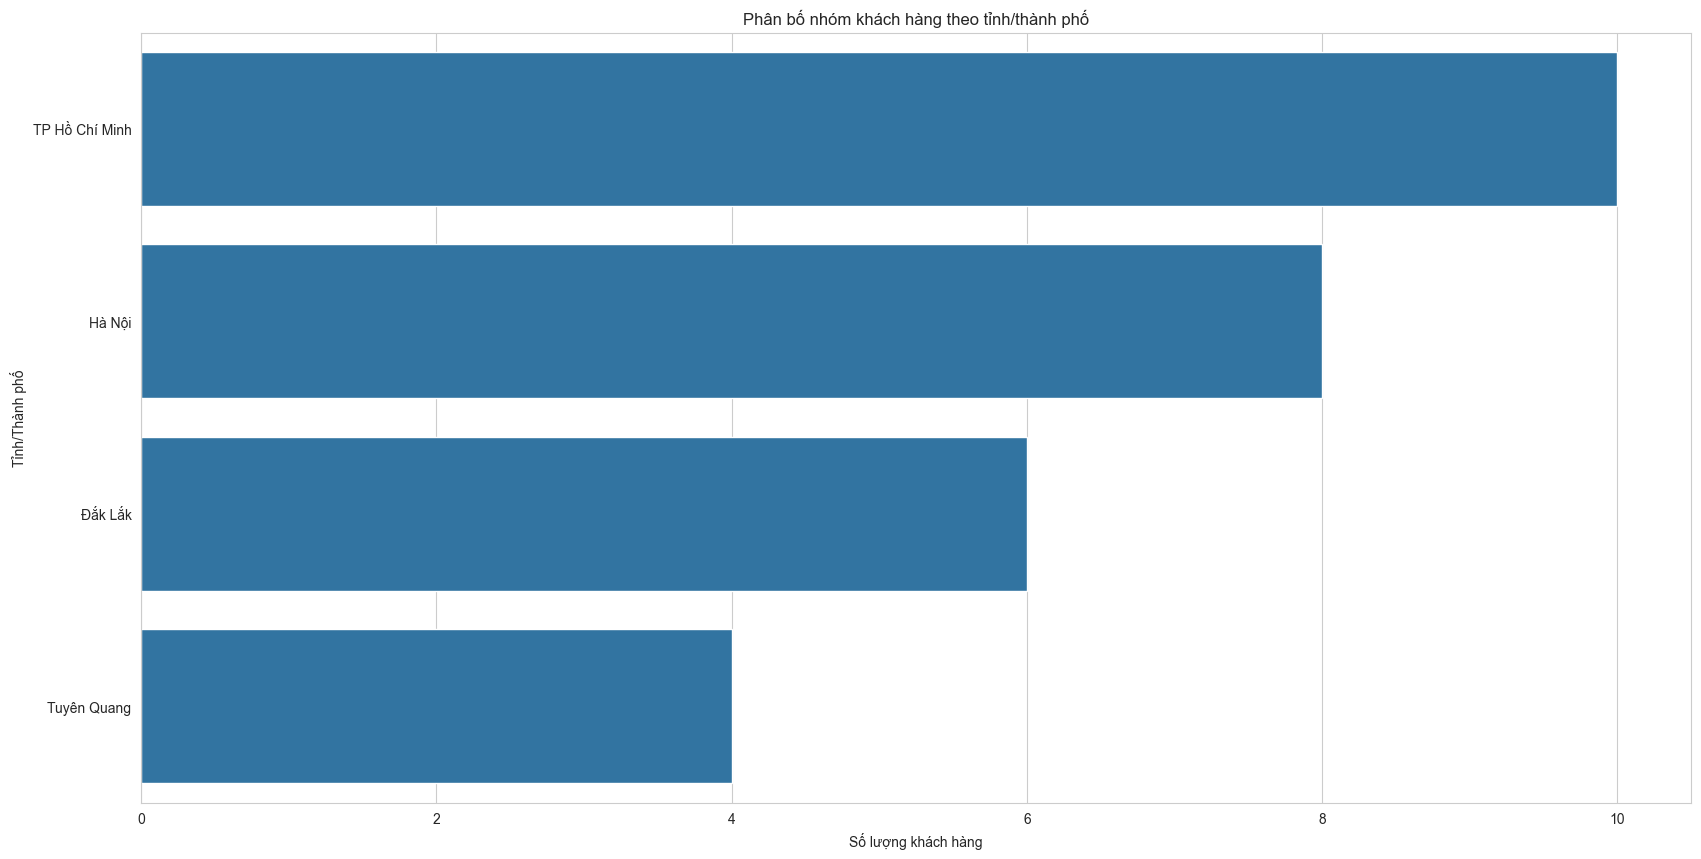

In [248]:
#Visual Tỉnh thành khách hàng có FADR trung binh
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group4, y="customer_province", order=df_group4["customer_province"].value_counts().index[:20])
plt.title("Phân bố nhóm khách hàng theo tỉnh/thành phố")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Tỉnh/Thành phố")
#plt.legend(title="Nhóm")
plt.show()

In [261]:
df_group4['customer_district'].value_counts()

customer_district
Quận 5                   9
Quận Hai Bà Trưng        8
Huyện Krông Bông         6
Thành phố Tuyên Quang    4
Quận 11                  1
Name: count, dtype: int64

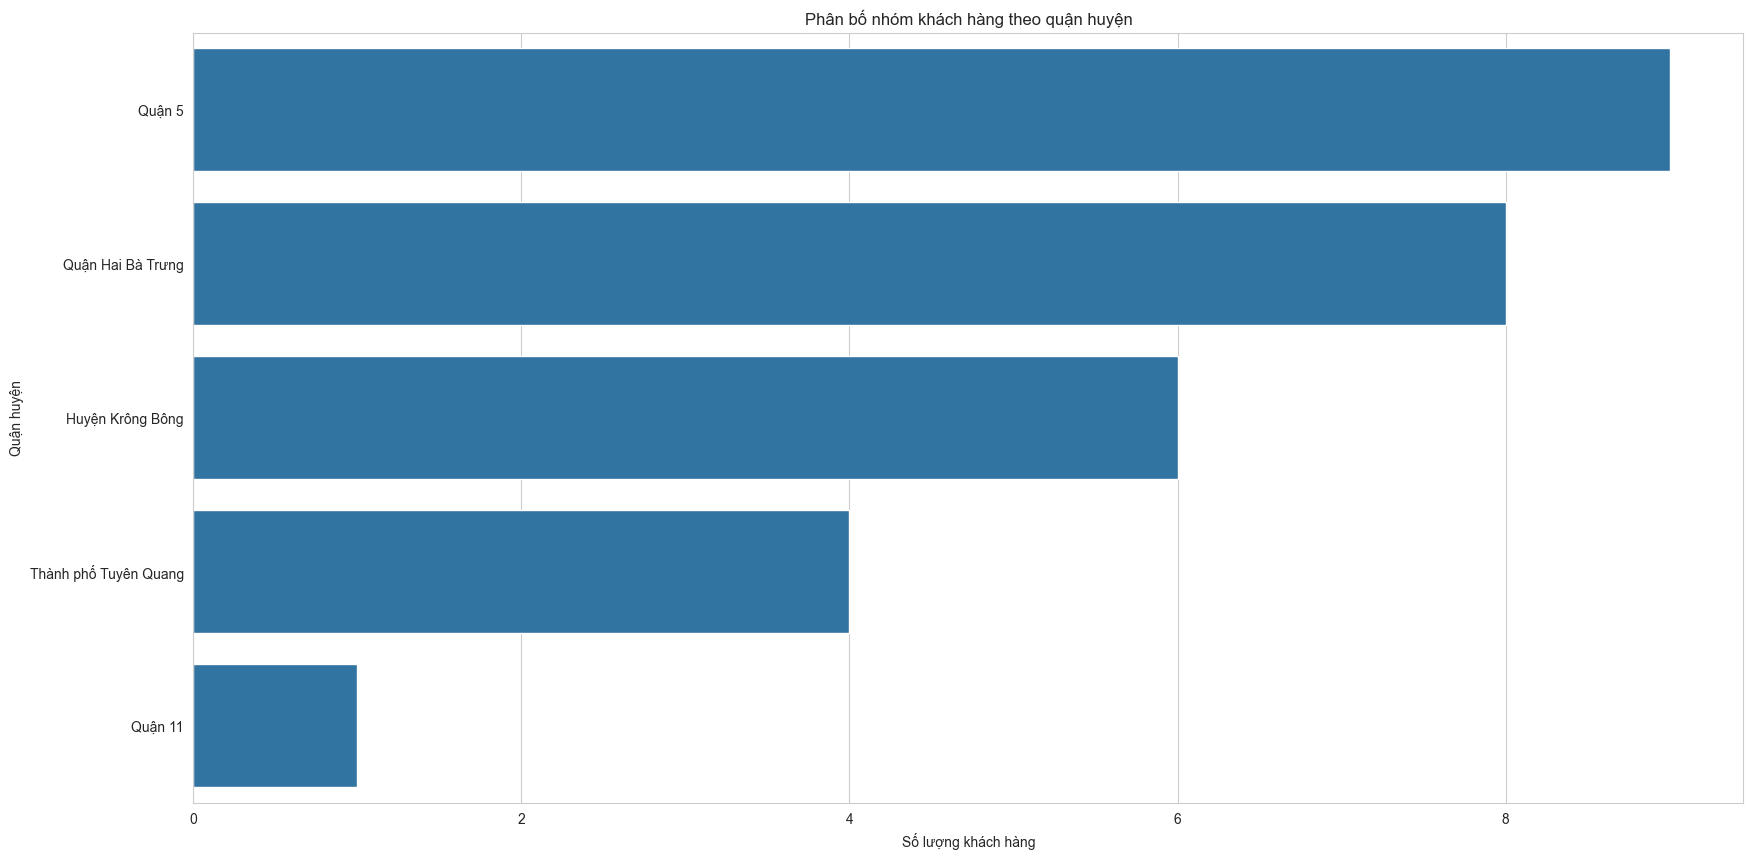

In [249]:
#Visual Quận huyện khách hàng có FADR trung bình 
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group4, y="customer_district", order=df_group4["customer_district"].value_counts().index[:30])
plt.title("Phân bố nhóm khách hàng theo quận huyện")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Quận huyện")
plt.show()

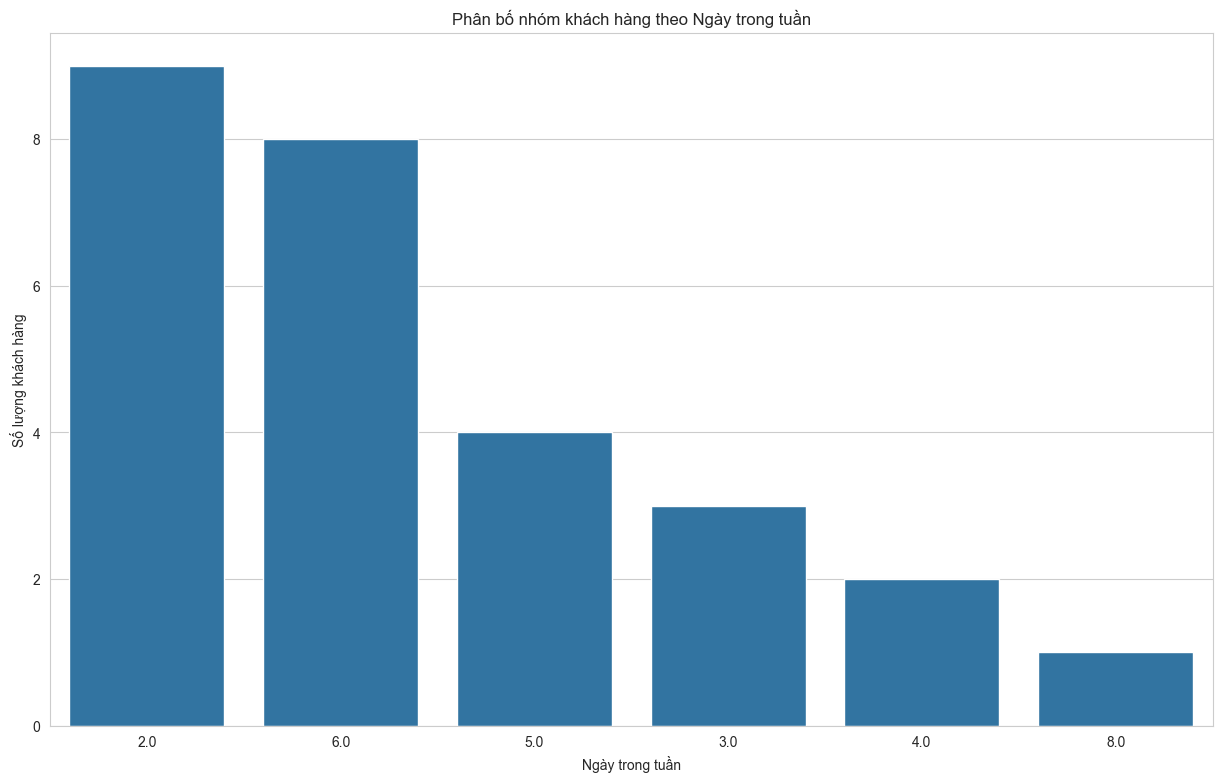

In [251]:
#Visual Ngày trong tuần nhận đơn hàng khách hàng có FADR trung bình
plt.figure(figsize=(15, 9))
sns.countplot(data=df_group4, x="deliver_dayofweek", order=df_group4["deliver_dayofweek"].value_counts().index)
plt.title("Phân bố nhóm khách hàng theo Ngày trong tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày trong tuần")
plt.show()

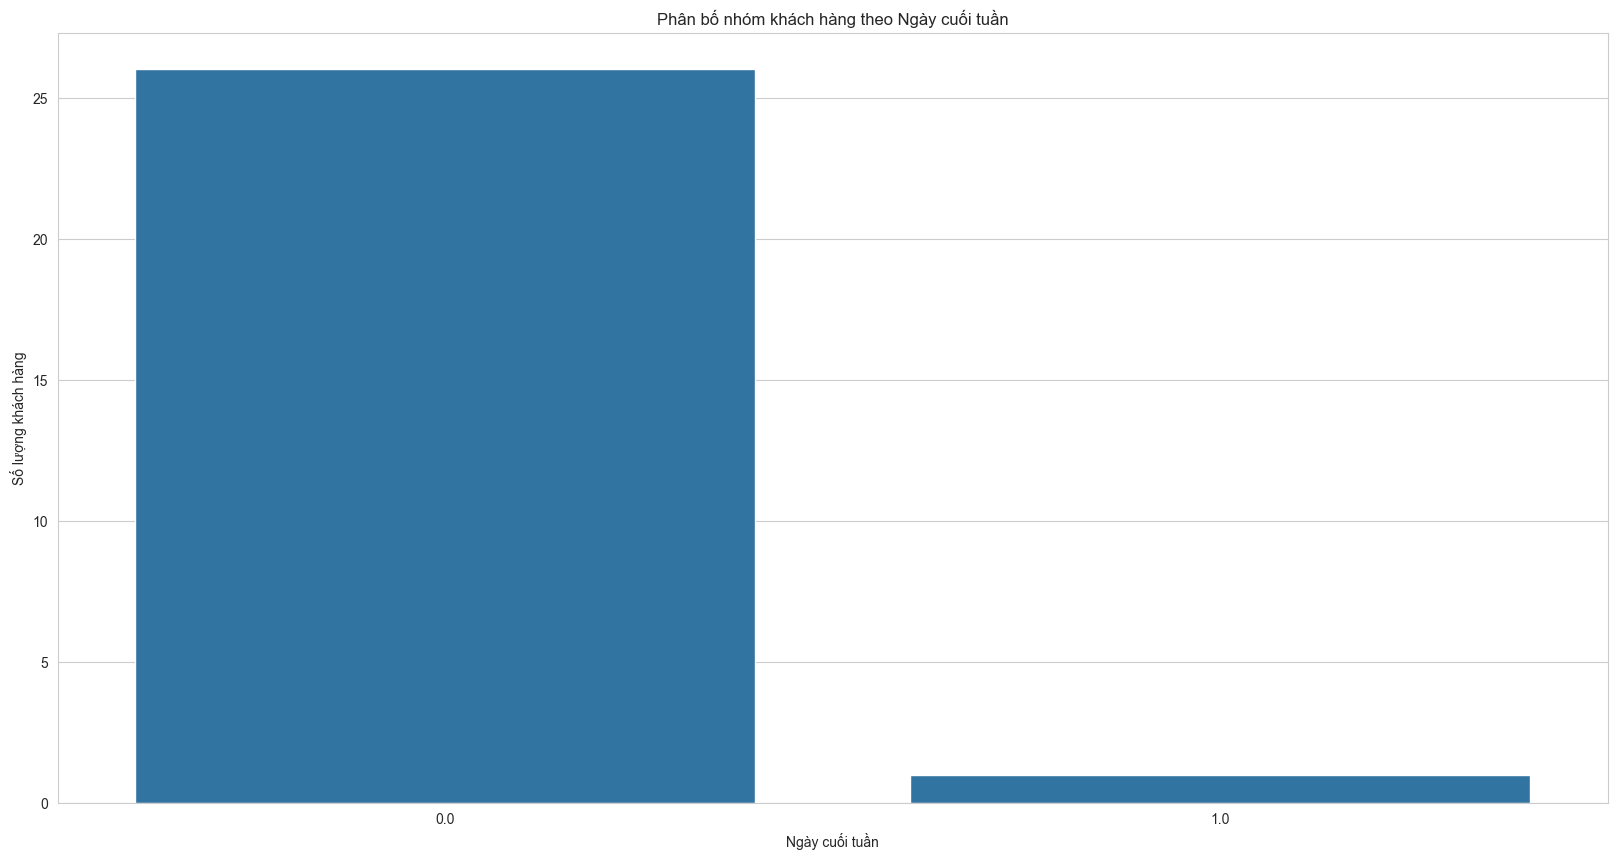

In [253]:
#Visual Ngày cuối tuần nhận đơn hàng khách hàng
plt.figure(figsize=(20, 10))
sns.countplot(data=df_group4, x="is_weekend", order=df_group4["is_weekend"].value_counts().index)
plt.title("Phân bố nhóm khách hàng theo Ngày cuối tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày cuối tuần")
plt.show()

In [254]:
df_group4.sort_values(by='value', ascending=False)['value']


3063    3000000
1858    3000000
1015    2999999
1456    2999999
2201    2999999
2914    1370000
1371     750000
2369     670000
2612     499000
3845     380000
1707     380000
241      335000
1065     325000
944      298000
2087     240000
1615     200000
1986     199000
2780     180000
519      175000
2543     160000
2963     160000
3640     160000
2061     150000
1457     149000
1507     130000
3614     130000
1895     129000
521      100000
Name: value, dtype: int64

In [257]:
df_group4.sort_values(by='value', ascending=False)['ghtk__orders__product_names']

3063                                                                                                                                                                                                                                                                                                                           {qate.}
1858    {Áo giữ nhiệt hàn tăm cao cấp(MÀU:Nâu đậm 06),Áo giữ nhiệt hàn tăm cao cấp(MÀU:Nâu vàng nhạt 05),Áo bra ngực đúc cao cấp(MÀU:Trắng, SIZE:S),Áo bra ngực đúc cao cấp(MÀU:Nâu, SIZE:S),Áo giữ nhiệt hàn tăm cao cấp(MÀU:Đỏ đô 08),Áo giữ nhiệt hàn tăm cao cấp(MÀU:Be nâu nhạt 04),Áo giữ nhiệt hàn tăm cao cấp(MÀU:Ghi đậm 12)}
1015                                                                                                                                                                                                                                                                                                                            {qate}
1456               

In [256]:
df_group4['nth_delivered'].value_counts()

nth_delivered
1    15
2     6
3     5
6     1
0     1
Name: count, dtype: int64

In [283]:
df_group4[df_group4['value'] >500000]['nth_delivered']

1015    3
1371    2
1456    2
1858    2
2201    1
2369    1
2914    1
3063    0
Name: nth_delivered, dtype: int64

In [282]:
df_group4[df_group4['value'] < 500000]['nth_delivered']

241     2
519     1
521     1
944     1
1065    1
1457    1
1507    1
1615    6
1707    3
1895    1
1986    1
2061    3
2087    1
2543    2
2612    3
2780    2
2963    1
3614    3
3640    1
3845    1
Name: nth_delivered, dtype: int64

Phân tích đặc điểm nhóm khách hàng nhận đơn ngay từ lần giao đầu tiên

In [284]:
df_first_success

,customer_tel,pkg_order,nth_delivered,created,done_at,took_at,shop_code,shop__shop_order,customer_province_id,customer_province,...,num_pkg_fsuccess,num_pkg_finish,num_pkg_success,fadr_c,first_time_deliver,deliver_work_shift,deliver_hour,deliver_dayofweek,is_weekend,type_address_arr
0,84843666166,1542866071,1,2025-02-12 11:38:14,2025-02-14 17:56:33,2025-02-12 20:55:39,S22002728,22002728,830,Hà Giang,...,4,29,15,0.137931,2025-02-15 00:23:40,2.0,17.0,6.0,0.0,{cửa hàng/tạp hoá}
8,84818901959,1334288375,1,2025-02-21 08:15:48,2025-02-24 13:54:03,2025-02-21 12:51:34,S20121773,20121773,126,TP Hồ Chí Minh,...,11,29,21,0.379310,2025-02-24 16:20:25,1.0,9.0,2.0,0.0,{cửa hàng/tạp hoá}
9,84975416039,1508388471,1,2025-01-10 16:22:07,2025-01-13 19:59:56,2025-01-10 18:40:07,S20780721,20780721,857,Ninh Thuận,...,11,29,28,0.379310,2025-01-13 19:59:27,1.0,12.0,2.0,0.0,{cửa hàng/tạp hoá}
27,84967960689,1314051989,1,2025-01-12 11:06:31,2025-01-14 18:17:27,2025-01-12 18:53:57,S22469890,22469890,816,Hưng Yên,...,10,29,28,0.344828,2025-01-15 00:56:48,2.0,17.0,3.0,0.0,{cửa hàng/tạp hoá}
33,84913885988,1486216864,1,2024-12-29 12:20:45,2025-01-01 13:58:46,2024-12-29 16:36:42,S17863034,17863034,841,Cà Mau,...,6,29,17,0.206897,2025-01-01 20:52:48,1.0,13.0,4.0,0.0,{cửa hàng/tạp hoá}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,84941535359,1236968001,1,2025-02-22 13:20:20,2025-02-23 15:30:38,2025-02-22 16:17:12,S2164998,2164998,851,Kiên Giang,...,4,28,23,0.142857,2025-02-23 21:11:44,2.0,14.0,8.0,1.0,{cửa hàng/tạp hoá}
3978,84865107663,1332719835,1,2025-01-07 13:16:27,2025-01-08 17:34:21,2025-01-07 16:40:31,S22738673,22738673,135,Hải Phòng,...,5,28,23,0.178571,2025-01-08 23:59:52,2.0,16.0,4.0,0.0,{cửa hàng/tạp hoá}
3983,84947702325,1831995928,1,2024-12-30 11:24:39,2025-01-01 18:00:48,2024-12-30 16:47:30,S22670966,22670966,843,Đắk Lắk,...,4,27,16,0.148148,2025-01-01 16:33:44,1.0,9.0,4.0,0.0,{cửa hàng/tạp hoá}
3987,84898499596,1863007030,1,2025-02-06 12:02:04,2025-02-10 19:48:39,2025-02-06 18:05:49,S20195674,20195674,868,Vĩnh Long,...,11,29,21,0.379310,2025-02-10 22:50:11,2.0,15.0,2.0,0.0,{cửa hàng/tạp hoá}


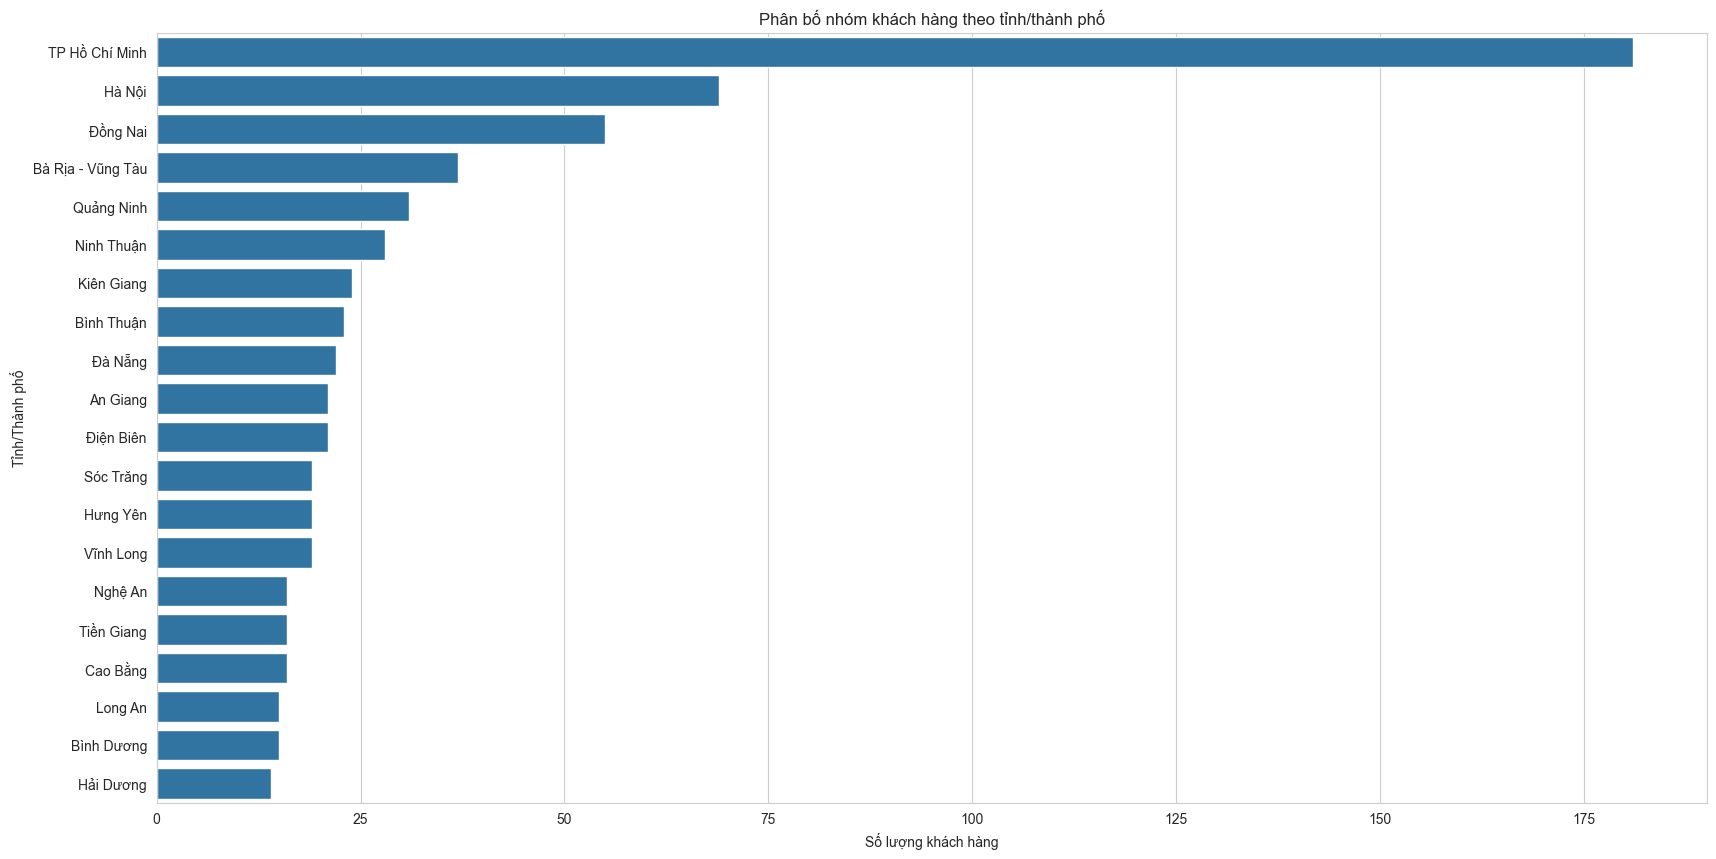

In [285]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df_first_success, y="customer_province", order=df_first_success["customer_province"].value_counts().index[:20])
plt.title("Phân bố nhóm khách hàng theo tỉnh/thành phố")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Tỉnh/Thành phố")
#plt.legend(title="Nhóm")
plt.show()

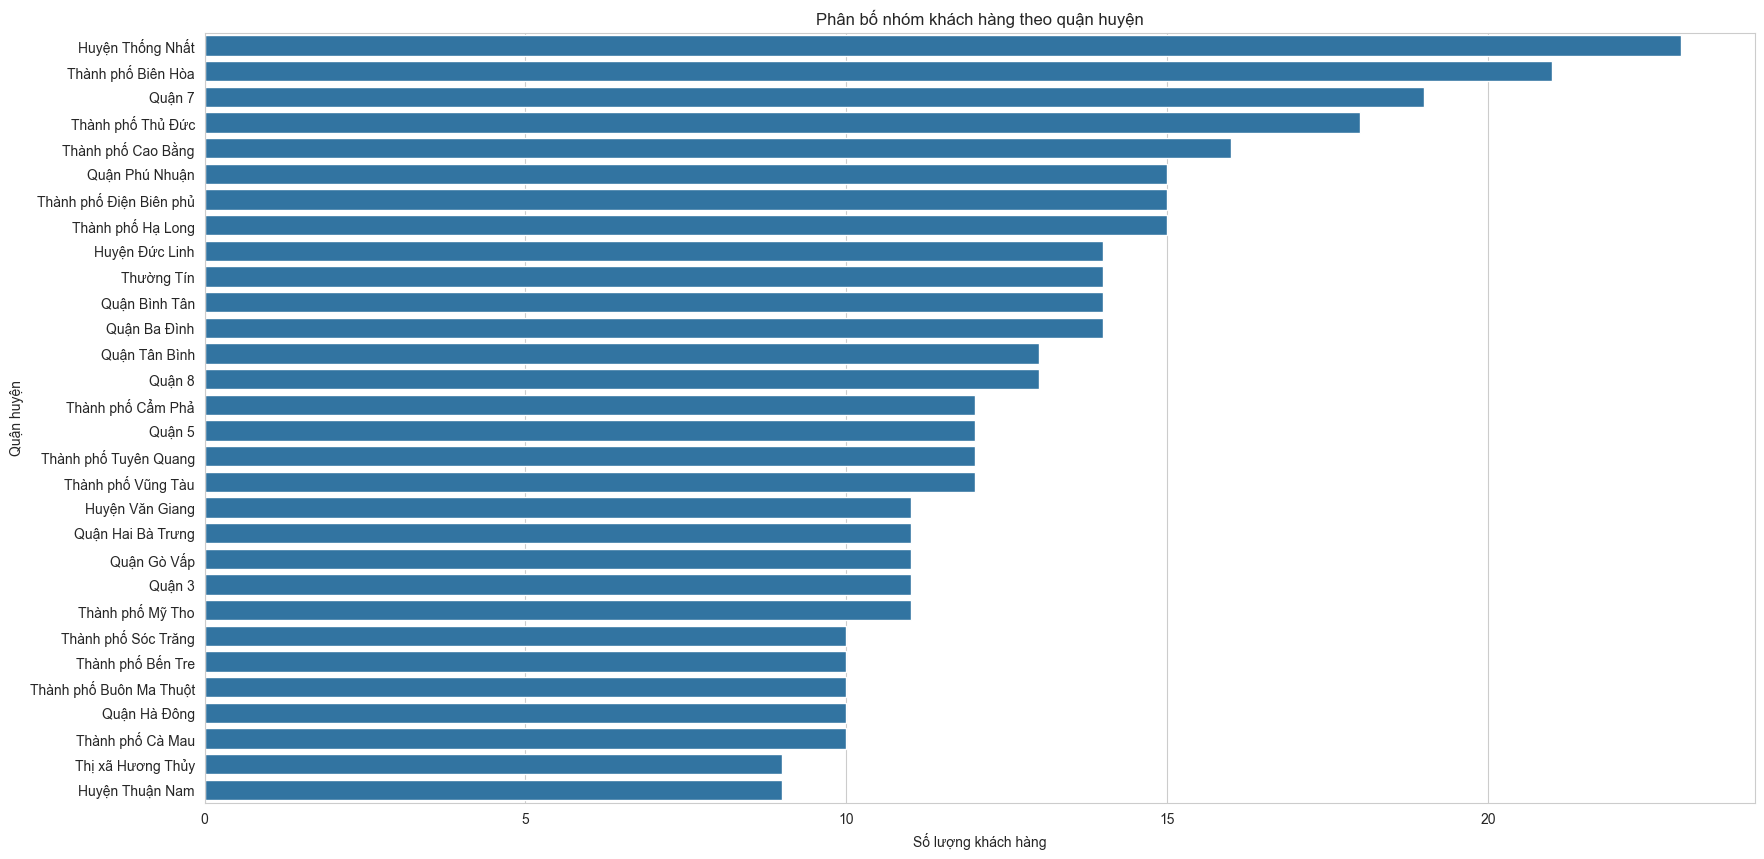

In [286]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df_first_success, y="customer_district", order=df_first_success["customer_district"].value_counts().index[:30])
plt.title("Phân bố nhóm khách hàng theo quận huyện")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Quận huyện")
plt.show()

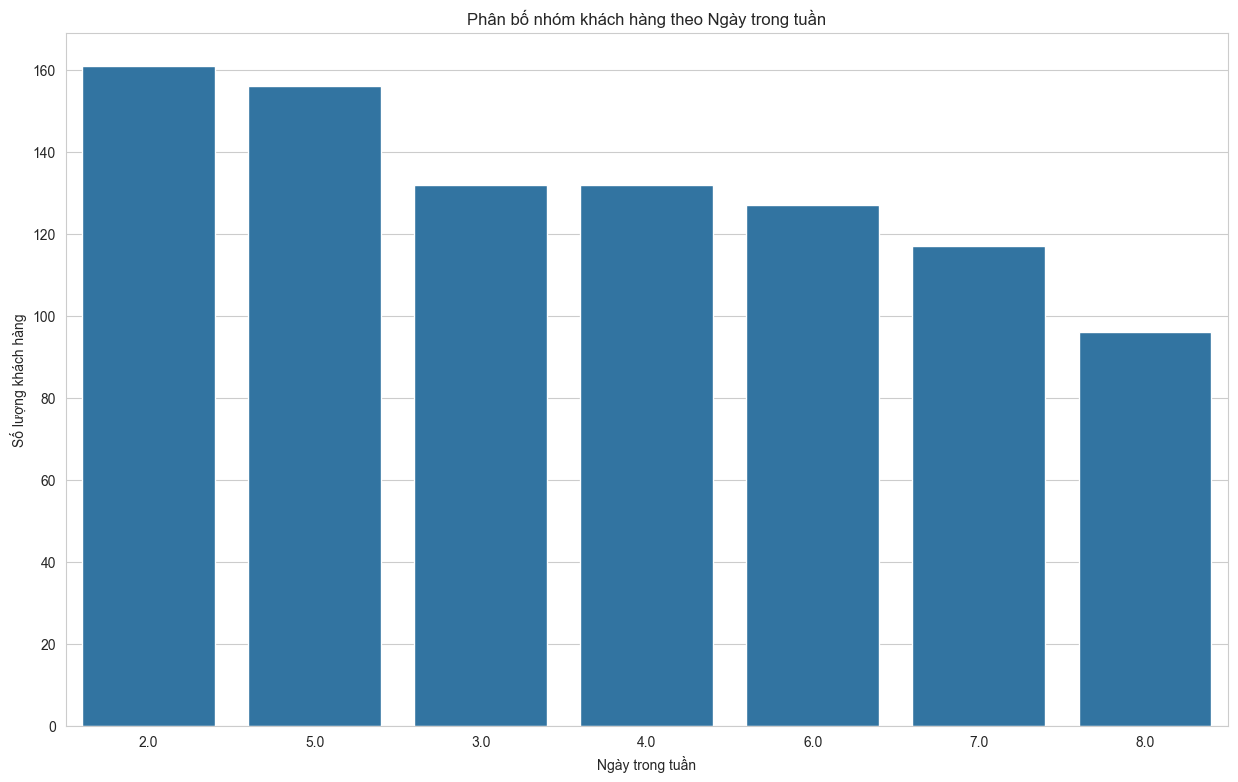

In [287]:
plt.figure(figsize=(15, 9))
sns.countplot(data=df_first_success, x="deliver_dayofweek", order=df_first_success["deliver_dayofweek"].value_counts().index)
plt.title("Phân bố nhóm khách hàng theo Ngày trong tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày trong tuần")
plt.show()

In [292]:
df_first_success['deliver_dayofweek'].value_counts()

deliver_dayofweek
2.0    161
5.0    156
3.0    132
4.0    132
6.0    127
7.0    117
8.0     96
Name: count, dtype: int64

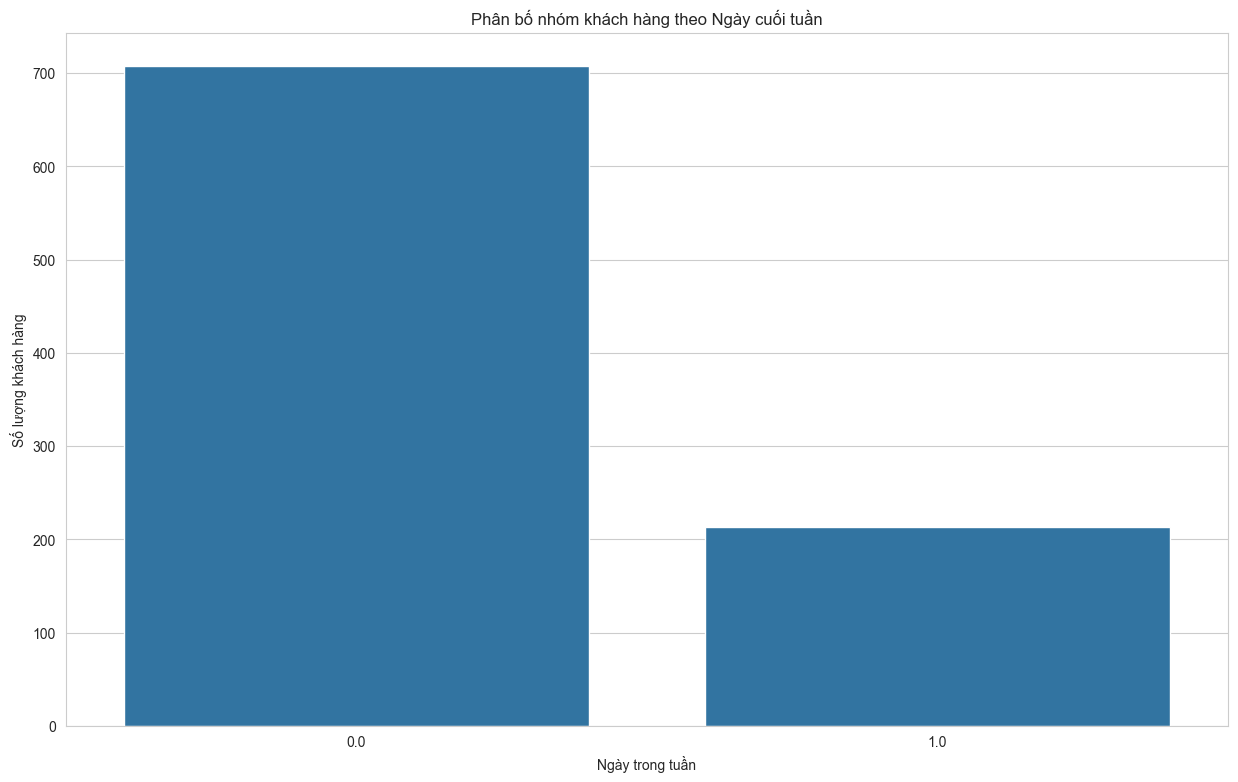

In [291]:
plt.figure(figsize=(15, 9))
sns.countplot(data=df_first_success, x="is_weekend", order=df_first_success["is_weekend"].value_counts().index)
plt.title("Phân bố nhóm khách hàng theo Ngày cuối tuần")
plt.ylabel("Số lượng khách hàng")
plt.xlabel("Ngày trong tuần")
plt.show()

In [288]:
df_first_success.sort_values(by='value', ascending=False)['value']


89      20000000
179     16400000
1585    14800000
2583    14600000
933     13000000
          ...   
2252       20000
210        10000
2135        1000
1548           1
3774           0
Name: value, Length: 921, dtype: int64

In [289]:
df_first_success.sort_values(by='value', ascending=False)['ghtk__orders__product_names']

89                        {16Promax Lock Sa Mạc 256gb CNC}
179                                 {điện thoại 11prm 256}
1585                 {15 Pro Lock Tự Nhiên 128gb Lướt CNC}
2583                       {14 Promax Vàng Lướt 256gb CNC}
933                                            {trang sức}
                               ...                        
2252                                                 {nón}
210                                              {quần áo}
2135                                     {camera bảo hành}
1548                            {HH - Sữa Zextra lon 400g}
3774    {Kenewomen REBRAND long sleeve croptop-Đen / Free}
Name: ghtk__orders__product_names, Length: 921, dtype: object